# DeepLabCut Notebook

## Create a new DeepLabCut Project

Note: Open this jupyter notebook in your DeepLabCut environment.

### Create DLC Project

Import python libraries needed for this notebook

In [1]:
try:
    import deeplabcut
    import tensorflow
    import tkinter
    from tkinter import filedialog

    print(f'Using DeepLabCut version: {deeplabcut. __version__}')
    print(f'Using TensorFlow version: {tensorflow. __version__}')

except:
    print("Please run the notebook in in your local environment")

Loading DLC 2.3.9...
Using DeepLabCut version: 2.3.9
Using TensorFlow version: 2.10.0


### You might have to import torch to use PyTorch engine ###

In [2]:
import torch
print("PyTorch version:", torch.__version__)
print("CUDA Available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))
    print("cuDNN Version:", torch.backends.cudnn.version())
    print("cuDNN Enabled:", torch.backends.cudnn.enabled)

PyTorch version: 1.12.0+cpu
CUDA Available: False


### Check PyTorch in DeepLabCut ###

In [3]:
if torch.cuda.is_available():
    print("DeepLabCut is using PyTorch with GPU support.")
else:
    print("DeepLabCut is using PyTorch on CPU.")

DeepLabCut is using PyTorch on CPU.


### Check TensorFlow Fallback ###

In [3]:
import tensorflow as tf

if tf.config.list_physical_devices('GPU'):
    print("DeepLabCut might be using TensorFlow with GPU support.")
else:
    print("DeepLabCut might be using TensorFlow on CPU.")
    
print(tf.config.list_physical_devices('GPU'))

DeepLabCut might be using TensorFlow with GPU support.
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


Start by selecting the list of videos to be included in the model. You could manually type the full path of each video in a python list as argument of the deeplabcut.create_new_project() function, like so:

In [ ]:
['C:\\Users\\computername\\Videos\\reachingvideo1.avi', 
 'C:\\Users\\computername\\Videos\\reachingvideo2.avi', 
 'C:\\Users\\computername\\Videos\\reachingvideo3.avi']

:::{note}
Windows users need to use the double backslash for path directories or a python raw filestring.
:::

Instead, we use ```tkinter``` to open a file dialoge and save the file paths in a python list called ```videolist```: 

In [4]:
video_files = filedialog.askopenfilenames(title='Choose new video files to analyze in DeepLabCut:')
videolist = list(video_files)

print(f'{len(videolist)} videos selected:')
for i in range(len(videolist)): 
    print(videolist[i])

6 videos selected:
C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Cre_WT_habituation_Trial_1_bottom_left.mp4
C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Cre_WT_habituation_Trial_1_bottom_right.mp4
C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Food_center_Trial_1_bottom_right.mp4
C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/FPP_Trial_1_bottom_right.mp4
C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Toy_Light_Trial_1_bottom_right.mp4
C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Trial_10_bottom_left.mp4


### Verify if the videos exist

In [5]:
print(videolist)

['C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Cre_WT_habituation_Trial_1_bottom_left.mp4', 'C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Cre_WT_habituation_Trial_1_bottom_right.mp4', 'C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Food_center_Trial_1_bottom_right.mp4', 'C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/FPP_Trial_1_bottom_right.mp4', 'C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Toy_Light_Trial_1_bottom_right.mp4', 'C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Trial_10_bottom_left.mp4']


Now we create a new project using the video paths in ```videolist```, give the project a name and set a few parameters:

In [17]:
config_path = deeplabcut.create_new_project('DLC', 'Atanu', videolist, working_directory='C:/DeepLabCutProjects/', copy_videos=True, multianimal=False)

Created "C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\videos"
Created "C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\labeled-data"
Created "C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\training-datasets"
Created "C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\dlc-models"
Copying the videos
C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\videos\Trial_10_top_right.mp4
Generated "C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\config.yaml"

A new project with name DLC-Atanu-2024-12-25 is created at C:\DeepLabCutProjects and a configurable file (config.yaml) is stored there. Change the parameters in this file to adapt to your project's needs.
 Once you have changed the configuration file, use the function 'extract_frames' to select frames for labeling.
. [OPTIONAL] Use the function 'add_new_videos' to add new videos to your project (at any stage).


:::{note}
You can load existing DeepLabCut projects by specifying the config_path as below:
:::

In [4]:
config_path = filedialog.askopenfilename(title='Choose DeepLabCut config.yaml file:')

In [5]:
print(config_path)

C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/config.yaml


### Check the Backend (TensorFlow or PyTorch)

In [6]:
try:
    from tensorflow.python.client import device_lib
    print("Using TensorFlow backend.")
except ImportError:
    try:
        import torch
        print("Using PyTorch backend.")
    except ImportError:
        print("No supported backend found. Ensure TensorFlow or PyTorch is installed.")

Using TensorFlow backend.


### Verify GPU Usage

In [7]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11762233355078615002
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2357670708
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16700912155385197462
physical_device_desc: "device: 0, name: NVIDIA T1000, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


### Configure Project

Now that a new project has been created with a specific directory structure and configuration file, we need to tweak some parameters to tailor the bodyparts we want to track:

In [ ]:
import webbrowser
webbrowser.open(config_path)
print('Please edit bodyparts list to be tracked')

In [37]:
with open(config_path, 'r') as file:
    config_content = file.read()
print(config_content)  # Display the file contents for editing

    # Project definitions (do not edit)
Task: DLC
scorer: Atanu
date: Dec23
multianimalproject: false
identity:

    # Project path (change when moving around)
project_path: C:\DeepLabCutProjects\DLC-Atanu-2024-12-23

    # Annotation data set configuration (and individual video cropping parameters)
video_sets:
  C:\DeepLabCutProjects\DLC-Atanu-2024-12-23\videos\Trial_10_top_right.mp4:
    crop: 0, 640, 0, 480
bodyparts:
- bodypart1
- bodypart2
- bodypart3
- objectA

    # Fraction of video to start/stop when extracting frames for labeling/refinement
start: 0
stop: 1
numframes2pick: 20

    # Plotting configuration
skeleton:
- - bodypart1
  - bodypart2
- - objectA
  - bodypart3
skeleton_color: black
pcutoff: 0.6
dotsize: 12
alphavalue: 0.7
colormap: rainbow

    # Training,Evaluation and Analysis configuration
TrainingFraction:
- 0.95
iteration: 0
default_net_type: resnet_50
default_augmenter: default
snapshotindex: -1
batch_size: 8

    # Cropping Parameters (for analysis and outlier 

Once happy with all ```bodyparts```, ```skeleton:``` and ```numframes2pick:``` settings, start extracting frames to label:


In [23]:
deeplabcut.extract_frames(config_path, mode='automatic', algo='kmeans', userfeedback=False, crop=False)

Config file read successfully.
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 37.6  seconds.
Extracting and downsampling... 376  frames from the video.


376it [00:00, 434.99it/s]
C:\Users\FriedmanLab Optogen\.conda\envs\DLC\lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Kmeans clustering ... (this might take a while)
Frames were successfully extracted, for the videos listed in the config.yaml file.

You can now label the frames using the function 'label_frames' (Note, you should label frames extracted from diverse videos (and many videos; we do not recommend training on single videos!)).


### Label Frames (Do it in GUI)

In [7]:
deeplabcut.label_frames(config_path)

In [9]:
import sys
print(sys.version)

3.8.20 | packaged by conda-forge | (default, Sep 30 2024, 17:44:03) [MSC v.1929 64 bit (AMD64)]


You can plot your labeled frames to check your annotation accuracy.

In [9]:
deeplabcut.check_labels(config_path)

Creating images with labels by Atanu.


100%|██████████| 20/20 [00:00<00:00, 36.27it/s]

If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


### Train Model

In [18]:
deeplabcut.create_training_dataset(config_path, num_shuffles=1, net_type='resnet_50', augmenter_type='imgaug')

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


[(0.95,
  1,
  (array([165,  19,  66, 198, 118, 176, 127, 159, 237,  47, 258, 233,  78,
           37, 131,  89, 175, 107, 190, 140,  88, 240, 166, 191, 255, 150,
          103, 156,  75, 188,  11,  10, 125,  16, 145,  85,  62, 110, 172,
          246, 248, 186, 157, 204,  23,  77, 174, 244,  96, 102,  15, 225,
          138,   2, 224,  17,  27, 152, 143, 162,  41,  45,  50,  57, 189,
          201, 239, 236, 245, 229, 252,  46, 132, 257,  21, 148,  90, 202,
          223, 182,  71,  82,  67, 254,  84, 253, 146,  95, 109, 149,  73,
          243, 212, 133, 235,  33, 123,  40, 179, 169,  69,  99, 134, 108,
          185,  39, 222,   1, 184, 161,  12, 217, 129, 187,  98, 211, 113,
          197,  76, 142,  35, 111, 130, 168,   9, 178, 196,  31,  63,  43,
           91, 104, 112, 232,  36, 155,  65,  42, 126,   3, 205, 247, 228,
          128, 137, 219,   7,  86, 119, 192, 115,  29, 241, 101,  97, 234,
          153,  54,  30, 195,  49, 100, 216,  24, 151, 114,  56, 144,  60,
            

In [17]:
deeplabcut.create_training_dataset?

In [13]:
import google.protobuf
print(google.protobuf.__version__)

3.19.6


In [21]:
deeplabcut.train_network(config_path, shuffle=1, gputouse=0, trainingsetindex=0, max_snapshots_to_keep=5, displayiters=200, saveiters=20000, maxiters=1030000, allow_growth=True)

Config:
{'all_joints': [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10]],
 'all_joints_names': ['Head',
                      'Leftear',
                      'Rightear',
                      'Tailbase',
                      'Neck',
                      'Midback',
                      'Lowerback',
                      'Corner1',
                      'Corner2',
                      'Corner3',
                      'Corner4'],
 'alpha_r': 0.02,
 'apply_prob': 0.5,
 'batch_size': 1,
 'contrast': {'clahe': True,
              'claheratio': 0.1,
              'histeq': True,
              'histeqratio': 0.1},
 'convolution': {'edge': False,
                 'emboss': {'alpha': [0.0, 1.0], 'strength': [0.5, 1.5]},
                 'embossratio': 0.1,
                 'sharpen': False,
                 'sharpenratio': 0.3},
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-3\\UnaugmentedDataSet_DLCDec25\\DLC_Atanu95shuffle1.mat',
 'dataset_type': 'imga

Selecting single-animal trainer
Batch Size is 1


C:\Users\FriedmanLab Optogen\.conda\envs\DLC\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Loading already trained DLC with backbone: resnet_50
Max_iters overwritten as 1030000
Display_iters overwritten as 200
Save_iters overwritten as 20000
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': 'C:\\DeepLabCutProjects\\DLC-Atanu-2024-12-25\\dlc-models\\iteration-3\\DLCDec25-trainset95shuffle1\\train\\snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'crop_pad': 0, 'scoremap_dir': 'test', 'batch_size': 1, 'dataset_type': 'imgaug', 'deterministic': False, 'mirror': False, 'pairwise_huber_loss': False, 'weigh_only_present_joints': False, 'partaffinityfield_predict': False, 'pairwise_predict': False,

iteration: 600200 loss: 0.0021 lr: 0.005
iteration: 600400 loss: 0.0024 lr: 0.005
iteration: 600600 loss: 0.0022 lr: 0.005
iteration: 600800 loss: 0.0021 lr: 0.005
iteration: 601000 loss: 0.0022 lr: 0.005
iteration: 601200 loss: 0.0021 lr: 0.005
iteration: 601400 loss: 0.0021 lr: 0.005
iteration: 601600 loss: 0.0024 lr: 0.005
iteration: 601800 loss: 0.0021 lr: 0.005
iteration: 602000 loss: 0.0021 lr: 0.005
iteration: 602200 loss: 0.0022 lr: 0.005
iteration: 602400 loss: 0.0023 lr: 0.005
iteration: 602600 loss: 0.0021 lr: 0.005
iteration: 602800 loss: 0.0022 lr: 0.005
iteration: 603000 loss: 0.0023 lr: 0.005
iteration: 603200 loss: 0.0022 lr: 0.005
iteration: 603400 loss: 0.0023 lr: 0.005
iteration: 603600 loss: 0.0024 lr: 0.005
iteration: 603800 loss: 0.0021 lr: 0.005
iteration: 604000 loss: 0.0023 lr: 0.005
iteration: 604200 loss: 0.0022 lr: 0.005
iteration: 604400 loss: 0.0024 lr: 0.005
iteration: 604600 loss: 0.0023 lr: 0.005
iteration: 604800 loss: 0.0022 lr: 0.005
iteration: 60500

iteration: 641000 loss: 0.0026 lr: 0.02
iteration: 641200 loss: 0.0025 lr: 0.02
iteration: 641400 loss: 0.0027 lr: 0.02
iteration: 641600 loss: 0.0028 lr: 0.02
iteration: 641800 loss: 0.0025 lr: 0.02
iteration: 642000 loss: 0.0023 lr: 0.02
iteration: 642200 loss: 0.0027 lr: 0.02
iteration: 642400 loss: 0.0026 lr: 0.02
iteration: 642600 loss: 0.0025 lr: 0.02
iteration: 642800 loss: 0.0025 lr: 0.02
iteration: 643000 loss: 0.0025 lr: 0.02
iteration: 643200 loss: 0.0026 lr: 0.02
iteration: 643400 loss: 0.0027 lr: 0.02
iteration: 643600 loss: 0.0026 lr: 0.02
iteration: 643800 loss: 0.0027 lr: 0.02
iteration: 644000 loss: 0.0027 lr: 0.02
iteration: 644200 loss: 0.0025 lr: 0.02
iteration: 644400 loss: 0.0028 lr: 0.02
iteration: 644600 loss: 0.0024 lr: 0.02
iteration: 644800 loss: 0.0027 lr: 0.02
iteration: 645000 loss: 0.0027 lr: 0.02
iteration: 645200 loss: 0.0025 lr: 0.02
iteration: 645400 loss: 0.0027 lr: 0.02
iteration: 645600 loss: 0.0027 lr: 0.02
iteration: 645800 loss: 0.0024 lr: 0.02


iteration: 682000 loss: 0.0025 lr: 0.02
iteration: 682200 loss: 0.0026 lr: 0.02
iteration: 682400 loss: 0.0027 lr: 0.02
iteration: 682600 loss: 0.0025 lr: 0.02
iteration: 682800 loss: 0.0025 lr: 0.02
iteration: 683000 loss: 0.0026 lr: 0.02
iteration: 683200 loss: 0.0024 lr: 0.02
iteration: 683400 loss: 0.0027 lr: 0.02
iteration: 683600 loss: 0.0023 lr: 0.02
iteration: 683800 loss: 0.0024 lr: 0.02
iteration: 684000 loss: 0.0026 lr: 0.02
iteration: 684200 loss: 0.0026 lr: 0.02
iteration: 684400 loss: 0.0025 lr: 0.02
iteration: 684600 loss: 0.0028 lr: 0.02
iteration: 684800 loss: 0.0025 lr: 0.02
iteration: 685000 loss: 0.0024 lr: 0.02
iteration: 685200 loss: 0.0026 lr: 0.02
iteration: 685400 loss: 0.0023 lr: 0.02
iteration: 685600 loss: 0.0024 lr: 0.02
iteration: 685800 loss: 0.0026 lr: 0.02
iteration: 686000 loss: 0.0025 lr: 0.02
iteration: 686200 loss: 0.0026 lr: 0.02
iteration: 686400 loss: 0.0024 lr: 0.02
iteration: 686600 loss: 0.0026 lr: 0.02
iteration: 686800 loss: 0.0025 lr: 0.02


iteration: 723000 loss: 0.0027 lr: 0.02
iteration: 723200 loss: 0.0023 lr: 0.02
iteration: 723400 loss: 0.0025 lr: 0.02
iteration: 723600 loss: 0.0024 lr: 0.02
iteration: 723800 loss: 0.0024 lr: 0.02
iteration: 724000 loss: 0.0024 lr: 0.02
iteration: 724200 loss: 0.0024 lr: 0.02
iteration: 724400 loss: 0.0026 lr: 0.02
iteration: 724600 loss: 0.0024 lr: 0.02
iteration: 724800 loss: 0.0025 lr: 0.02
iteration: 725000 loss: 0.0024 lr: 0.02
iteration: 725200 loss: 0.0024 lr: 0.02
iteration: 725400 loss: 0.0024 lr: 0.02
iteration: 725600 loss: 0.0025 lr: 0.02
iteration: 725800 loss: 0.0025 lr: 0.02
iteration: 726000 loss: 0.0024 lr: 0.02
iteration: 726200 loss: 0.0026 lr: 0.02
iteration: 726400 loss: 0.0023 lr: 0.02
iteration: 726600 loss: 0.0024 lr: 0.02
iteration: 726800 loss: 0.0025 lr: 0.02
iteration: 727000 loss: 0.0027 lr: 0.02
iteration: 727200 loss: 0.0026 lr: 0.02
iteration: 727400 loss: 0.0022 lr: 0.02
iteration: 727600 loss: 0.0025 lr: 0.02
iteration: 727800 loss: 0.0025 lr: 0.02


iteration: 764000 loss: 0.0025 lr: 0.02
iteration: 764200 loss: 0.0023 lr: 0.02
iteration: 764400 loss: 0.0024 lr: 0.02
iteration: 764600 loss: 0.0024 lr: 0.02
iteration: 764800 loss: 0.0024 lr: 0.02
iteration: 765000 loss: 0.0024 lr: 0.02
iteration: 765200 loss: 0.0025 lr: 0.02
iteration: 765400 loss: 0.0026 lr: 0.02
iteration: 765600 loss: 0.0022 lr: 0.02
iteration: 765800 loss: 0.0024 lr: 0.02
iteration: 766000 loss: 0.0023 lr: 0.02
iteration: 766200 loss: 0.0025 lr: 0.02
iteration: 766400 loss: 0.0024 lr: 0.02
iteration: 766600 loss: 0.0023 lr: 0.02
iteration: 766800 loss: 0.0025 lr: 0.02
iteration: 767000 loss: 0.0022 lr: 0.02
iteration: 767200 loss: 0.0025 lr: 0.02
iteration: 767400 loss: 0.0023 lr: 0.02
iteration: 767600 loss: 0.0025 lr: 0.02
iteration: 767800 loss: 0.0023 lr: 0.02
iteration: 768000 loss: 0.0025 lr: 0.02
iteration: 768200 loss: 0.0023 lr: 0.02
iteration: 768400 loss: 0.0025 lr: 0.02
iteration: 768600 loss: 0.0024 lr: 0.02
iteration: 768800 loss: 0.0025 lr: 0.02


iteration: 805000 loss: 0.0022 lr: 0.02
iteration: 805200 loss: 0.0024 lr: 0.02
iteration: 805400 loss: 0.0022 lr: 0.02
iteration: 805600 loss: 0.0024 lr: 0.02
iteration: 805800 loss: 0.0024 lr: 0.02
iteration: 806000 loss: 0.0024 lr: 0.02
iteration: 806200 loss: 0.0022 lr: 0.02
iteration: 806400 loss: 0.0024 lr: 0.02
iteration: 806600 loss: 0.0027 lr: 0.02
iteration: 806800 loss: 0.0022 lr: 0.02
iteration: 807000 loss: 0.0023 lr: 0.02
iteration: 807200 loss: 0.0028 lr: 0.02
iteration: 807400 loss: 0.0023 lr: 0.02
iteration: 807600 loss: 0.0022 lr: 0.02
iteration: 807800 loss: 0.0022 lr: 0.02
iteration: 808000 loss: 0.0023 lr: 0.02
iteration: 808200 loss: 0.0023 lr: 0.02
iteration: 808400 loss: 0.0023 lr: 0.02
iteration: 808600 loss: 0.0024 lr: 0.02
iteration: 808800 loss: 0.0023 lr: 0.02
iteration: 809000 loss: 0.0023 lr: 0.02
iteration: 809200 loss: 0.0023 lr: 0.02
iteration: 809400 loss: 0.0024 lr: 0.02
iteration: 809600 loss: 0.0023 lr: 0.02
iteration: 809800 loss: 0.0023 lr: 0.02


iteration: 846000 loss: 0.0024 lr: 0.02
iteration: 846200 loss: 0.0023 lr: 0.02
iteration: 846400 loss: 0.0023 lr: 0.02
iteration: 846600 loss: 0.0023 lr: 0.02
iteration: 846800 loss: 0.0022 lr: 0.02
iteration: 847000 loss: 0.0024 lr: 0.02
iteration: 847200 loss: 0.0020 lr: 0.02
iteration: 847400 loss: 0.0025 lr: 0.02
iteration: 847600 loss: 0.0023 lr: 0.02
iteration: 847800 loss: 0.0026 lr: 0.02
iteration: 848000 loss: 0.0025 lr: 0.02
iteration: 848200 loss: 0.0024 lr: 0.02
iteration: 848400 loss: 0.0024 lr: 0.02
iteration: 848600 loss: 0.0023 lr: 0.02
iteration: 848800 loss: 0.0022 lr: 0.02
iteration: 849000 loss: 0.0022 lr: 0.02
iteration: 849200 loss: 0.0023 lr: 0.02
iteration: 849400 loss: 0.0023 lr: 0.02
iteration: 849600 loss: 0.0022 lr: 0.02
iteration: 849800 loss: 0.0024 lr: 0.02
iteration: 850000 loss: 0.0023 lr: 0.02
iteration: 850200 loss: 0.0022 lr: 0.02
iteration: 850400 loss: 0.0023 lr: 0.02
iteration: 850600 loss: 0.0024 lr: 0.02
iteration: 850800 loss: 0.0023 lr: 0.02


iteration: 887000 loss: 0.0023 lr: 0.02
iteration: 887200 loss: 0.0022 lr: 0.02
iteration: 887400 loss: 0.0024 lr: 0.02
iteration: 887600 loss: 0.0021 lr: 0.02
iteration: 887800 loss: 0.0022 lr: 0.02
iteration: 888000 loss: 0.0023 lr: 0.02
iteration: 888200 loss: 0.0023 lr: 0.02
iteration: 888400 loss: 0.0022 lr: 0.02
iteration: 888600 loss: 0.0024 lr: 0.02
iteration: 888800 loss: 0.0023 lr: 0.02
iteration: 889000 loss: 0.0022 lr: 0.02
iteration: 889200 loss: 0.0024 lr: 0.02
iteration: 889400 loss: 0.0023 lr: 0.02
iteration: 889600 loss: 0.0023 lr: 0.02
iteration: 889800 loss: 0.0023 lr: 0.02
iteration: 890000 loss: 0.0021 lr: 0.02
iteration: 890200 loss: 0.0022 lr: 0.02
iteration: 890400 loss: 0.0024 lr: 0.02
iteration: 890600 loss: 0.0023 lr: 0.02
iteration: 890800 loss: 0.0023 lr: 0.02
iteration: 891000 loss: 0.0023 lr: 0.02
iteration: 891200 loss: 0.0022 lr: 0.02
iteration: 891400 loss: 0.0022 lr: 0.02
iteration: 891600 loss: 0.0024 lr: 0.02
iteration: 891800 loss: 0.0022 lr: 0.02


iteration: 928000 loss: 0.0022 lr: 0.02
iteration: 928200 loss: 0.0022 lr: 0.02
iteration: 928400 loss: 0.0022 lr: 0.02
iteration: 928600 loss: 0.0023 lr: 0.02
iteration: 928800 loss: 0.0023 lr: 0.02
iteration: 929000 loss: 0.0022 lr: 0.02
iteration: 929200 loss: 0.0023 lr: 0.02
iteration: 929400 loss: 0.0022 lr: 0.02
iteration: 929600 loss: 0.0021 lr: 0.02
iteration: 929800 loss: 0.0023 lr: 0.02
iteration: 930000 loss: 0.0021 lr: 0.02
iteration: 930200 loss: 0.0021 lr: 0.02
iteration: 930400 loss: 0.0023 lr: 0.02
iteration: 930600 loss: 0.0024 lr: 0.02
iteration: 930800 loss: 0.0022 lr: 0.02
iteration: 931000 loss: 0.0022 lr: 0.02
iteration: 931200 loss: 0.0024 lr: 0.02
iteration: 931400 loss: 0.0025 lr: 0.02
iteration: 931600 loss: 0.0023 lr: 0.02
iteration: 931800 loss: 0.0027 lr: 0.02
iteration: 932000 loss: 0.0023 lr: 0.02
iteration: 932200 loss: 0.0024 lr: 0.02
iteration: 932400 loss: 0.0022 lr: 0.02
iteration: 932600 loss: 0.0022 lr: 0.02
iteration: 932800 loss: 0.0021 lr: 0.02


iteration: 969000 loss: 0.0022 lr: 0.02
iteration: 969200 loss: 0.0021 lr: 0.02
iteration: 969400 loss: 0.0021 lr: 0.02
iteration: 969600 loss: 0.0020 lr: 0.02
iteration: 969800 loss: 0.0022 lr: 0.02
iteration: 970000 loss: 0.0023 lr: 0.02
iteration: 970200 loss: 0.0022 lr: 0.02
iteration: 970400 loss: 0.0022 lr: 0.02
iteration: 970600 loss: 0.0021 lr: 0.02
iteration: 970800 loss: 0.0022 lr: 0.02
iteration: 971000 loss: 0.0020 lr: 0.02
iteration: 971200 loss: 0.0022 lr: 0.02
iteration: 971400 loss: 0.0023 lr: 0.02
iteration: 971600 loss: 0.0022 lr: 0.02
iteration: 971800 loss: 0.0024 lr: 0.02
iteration: 972000 loss: 0.0022 lr: 0.02
iteration: 972200 loss: 0.0022 lr: 0.02
iteration: 972400 loss: 0.0022 lr: 0.02
iteration: 972600 loss: 0.0022 lr: 0.02
iteration: 972800 loss: 0.0022 lr: 0.02
iteration: 973000 loss: 0.0020 lr: 0.02
iteration: 973200 loss: 0.0022 lr: 0.02
iteration: 973400 loss: 0.0022 lr: 0.02
iteration: 973600 loss: 0.0025 lr: 0.02
iteration: 973800 loss: 0.0026 lr: 0.02


iteration: 1009800 loss: 0.0023 lr: 0.02
iteration: 1010000 loss: 0.0024 lr: 0.02
iteration: 1010200 loss: 0.0022 lr: 0.02
iteration: 1010400 loss: 0.0023 lr: 0.02
iteration: 1010600 loss: 0.0021 lr: 0.02
iteration: 1010800 loss: 0.0021 lr: 0.02
iteration: 1011000 loss: 0.0023 lr: 0.02
iteration: 1011200 loss: 0.0024 lr: 0.02
iteration: 1011400 loss: 0.0021 lr: 0.02
iteration: 1011600 loss: 0.0022 lr: 0.02
iteration: 1011800 loss: 0.0021 lr: 0.02
iteration: 1012000 loss: 0.0024 lr: 0.02
iteration: 1012200 loss: 0.0021 lr: 0.02
iteration: 1012400 loss: 0.0023 lr: 0.02
iteration: 1012600 loss: 0.0023 lr: 0.02
iteration: 1012800 loss: 0.0021 lr: 0.02
iteration: 1013000 loss: 0.0024 lr: 0.02
iteration: 1013200 loss: 0.0024 lr: 0.02
iteration: 1013400 loss: 0.0022 lr: 0.02
iteration: 1013600 loss: 0.0022 lr: 0.02
iteration: 1013800 loss: 0.0021 lr: 0.02
iteration: 1014000 loss: 0.0020 lr: 0.02
iteration: 1014200 loss: 0.0023 lr: 0.02
iteration: 1014400 loss: 0.0022 lr: 0.02
iteration: 10146

iteration: 1049400 loss: 0.0018 lr: 0.002
iteration: 1049600 loss: 0.0018 lr: 0.002
iteration: 1049800 loss: 0.0020 lr: 0.002
iteration: 1050000 loss: 0.0021 lr: 0.002
iteration: 1050200 loss: 0.0020 lr: 0.002
iteration: 1050400 loss: 0.0019 lr: 0.002
iteration: 1050600 loss: 0.0020 lr: 0.002
iteration: 1050800 loss: 0.0020 lr: 0.002
iteration: 1051000 loss: 0.0019 lr: 0.002
iteration: 1051200 loss: 0.0021 lr: 0.002
iteration: 1051400 loss: 0.0019 lr: 0.002
iteration: 1051600 loss: 0.0020 lr: 0.002
iteration: 1051800 loss: 0.0020 lr: 0.002
iteration: 1052000 loss: 0.0019 lr: 0.002
iteration: 1052200 loss: 0.0019 lr: 0.002
iteration: 1052400 loss: 0.0019 lr: 0.002
iteration: 1052600 loss: 0.0019 lr: 0.002
iteration: 1052800 loss: 0.0018 lr: 0.002
iteration: 1053000 loss: 0.0018 lr: 0.002
iteration: 1053200 loss: 0.0020 lr: 0.002
iteration: 1053400 loss: 0.0019 lr: 0.002
iteration: 1053600 loss: 0.0019 lr: 0.002
iteration: 1053800 loss: 0.0019 lr: 0.002
iteration: 1054000 loss: 0.0019 lr

iteration: 1088600 loss: 0.0019 lr: 0.002
iteration: 1088800 loss: 0.0020 lr: 0.002
iteration: 1089000 loss: 0.0019 lr: 0.002
iteration: 1089200 loss: 0.0018 lr: 0.002
iteration: 1089400 loss: 0.0020 lr: 0.002
iteration: 1089600 loss: 0.0021 lr: 0.002
iteration: 1089800 loss: 0.0019 lr: 0.002
iteration: 1090000 loss: 0.0018 lr: 0.002
iteration: 1090200 loss: 0.0020 lr: 0.002
iteration: 1090400 loss: 0.0019 lr: 0.002
iteration: 1090600 loss: 0.0019 lr: 0.002
iteration: 1090800 loss: 0.0020 lr: 0.002
iteration: 1091000 loss: 0.0020 lr: 0.002
iteration: 1091200 loss: 0.0020 lr: 0.002
iteration: 1091400 loss: 0.0018 lr: 0.002
iteration: 1091600 loss: 0.0018 lr: 0.002
iteration: 1091800 loss: 0.0019 lr: 0.002
iteration: 1092000 loss: 0.0020 lr: 0.002
iteration: 1092200 loss: 0.0018 lr: 0.002
iteration: 1092400 loss: 0.0019 lr: 0.002
iteration: 1092600 loss: 0.0019 lr: 0.002
iteration: 1092800 loss: 0.0018 lr: 0.002
iteration: 1093000 loss: 0.0019 lr: 0.002
iteration: 1093200 loss: 0.0021 lr

iteration: 1127800 loss: 0.0019 lr: 0.002
iteration: 1128000 loss: 0.0019 lr: 0.002
iteration: 1128200 loss: 0.0018 lr: 0.002
iteration: 1128400 loss: 0.0018 lr: 0.002
iteration: 1128600 loss: 0.0017 lr: 0.002
iteration: 1128800 loss: 0.0019 lr: 0.002
iteration: 1129000 loss: 0.0018 lr: 0.002
iteration: 1129200 loss: 0.0018 lr: 0.002
iteration: 1129400 loss: 0.0021 lr: 0.002
iteration: 1129600 loss: 0.0018 lr: 0.002
iteration: 1129800 loss: 0.0018 lr: 0.002
iteration: 1130000 loss: 0.0019 lr: 0.002
iteration: 1130200 loss: 0.0019 lr: 0.002
iteration: 1130400 loss: 0.0018 lr: 0.002
iteration: 1130600 loss: 0.0020 lr: 0.002
iteration: 1130800 loss: 0.0019 lr: 0.002
iteration: 1131000 loss: 0.0018 lr: 0.002
iteration: 1131200 loss: 0.0018 lr: 0.002
iteration: 1131400 loss: 0.0019 lr: 0.002
iteration: 1131600 loss: 0.0018 lr: 0.002
iteration: 1131800 loss: 0.0017 lr: 0.002
iteration: 1132000 loss: 0.0019 lr: 0.002
iteration: 1132200 loss: 0.0018 lr: 0.002
iteration: 1132400 loss: 0.0019 lr

KeyboardInterrupt: 

In [7]:
deeplabcut.train_network?

### Evaluate Model

Running  DLC_resnet50_DLCDec25shuffle1_1140000  with # of training iterations: 1140000


C:\Users\FriedmanLab Optogen\.conda\envs\DLC\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Running evaluation ...


260it [00:19, 13.62it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-1140000
Results for 1140000  training iterations: 95 1 train error: 1.83 pixels. Test error: 2.72  pixels.
With pcutoff of 0.6  train error: 1.83 pixels. Test error: 2.69 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 260/260 [01:03<00:00,  4.08it/s]

The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
Please check the results, then choose the best model (snapshot) for prediction. You can update the config.yaml file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise, consider adding more labeled-data and retraining the network (see DeepLabCut workflow Fig 2, Nath 2019)


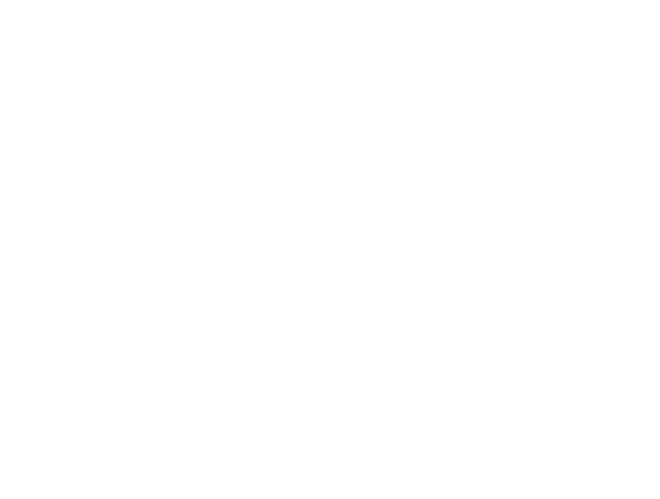

In [7]:
deeplabcut.evaluate_network(config_path, Shuffles=[1], gputouse=0, plotting=True)

### Analyze Videos

In [8]:
deeplabcut.analyze_videos(config_path, videolist, shuffle=1, save_as_csv=True) #, videotype='mp4')

Using snapshot-1140000 for model C:/DeepLabCutProjects/DLC-Atanu-2024-12-25\dlc-models\iteration-3\DLCDec25-trainset95shuffle1


C:\Users\FriedmanLab Optogen\.conda\envs\DLC\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Starting to analyze %  C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Cre_WT_habituation_Trial_1_bottom_left.mp4
Loading  C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Cre_WT_habituation_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:37<00:00, 65.65it/s]


Saving results in C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\videos...
Saving csv poses!
Starting to analyze %  C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Cre_WT_habituation_Trial_1_bottom_right.mp4
Loading  C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Cre_WT_habituation_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:40<00:00, 65.19it/s]


Saving results in C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\videos...
Saving csv poses!
Starting to analyze %  C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Food_center_Trial_1_bottom_right.mp4
Loading  C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Food_center_Trial_1_bottom_right.mp4
Duration of video [s]:  695.9 , recorded with  10.0 fps!
Overall # of frames:  6959  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 6959/6959 [04:37<00:00, 25.10it/s]


Saving results in C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\videos...
Saving csv poses!
Starting to analyze %  C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/FPP_Trial_1_bottom_right.mp4
Loading  C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/FPP_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.8 , recorded with  10.0 fps!
Overall # of frames:  12008  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 12008/12008 [07:52<00:00, 25.42it/s]


Saving results in C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\videos...
Saving csv poses!
Starting to analyze %  C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Toy_Light_Trial_1_bottom_right.mp4
Loading  C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Toy_Light_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.64 , recorded with  25.0 fps!
Overall # of frames:  30016  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30016/30016 [07:35<00:00, 65.85it/s]


Saving results in C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\videos...
Saving csv poses!
Starting to analyze %  C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Trial_10_bottom_left.mp4
Loading  C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Trial_10_bottom_left.mp4
Duration of video [s]:  37.6 , recorded with  10.0 fps!
Overall # of frames:  376  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 376/376 [00:15<00:00, 24.77it/s]

Saving results in C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\videos...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.


'DLC_resnet50_DLCDec25shuffle1_1140000'

In [12]:
deeplabcut.filterpredictions(config_path, videolist, videotype='.mp4',filtertype='median')#,filtertype='arima',ARdegree=5,MAdegree=2)

Filtering with median model C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Cre_WT_habituation_Trial_1_bottom_left.mp4
Data from Cre_WT_habituation_Trial_1_bottom_left were already filtered. Skipping...
Filtering with median model C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Cre_WT_habituation_Trial_1_bottom_right.mp4
Saving filtered csv poses!
Filtering with median model C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Food_center_Trial_1_bottom_right.mp4
Saving filtered csv poses!
Filtering with median model C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/FPP_Trial_1_bottom_right.mp4
Saving filtered csv poses!
Filtering with median model C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Toy_Light_Trial_1_bottom_right.mp4
Saving filtered csv poses!
Filtering with median model C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Trial_10_bottom_left.mp4
Saving filtered csv poses!


In [17]:
deeplabcut.filterpredictions?

In [11]:
deeplabcut.analyzeskeleton(config_path, videolist, videotype='.mp4', shuffle=1, trainingsetindex=0, save_as_csv=False, destfolder=None)

Processing C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Cre_WT_habituation_Trial_1_bottom_left.mp4
Skeleton in video Cre_WT_habituation_Trial_1_bottom_left already processed. Skipping...
Processing C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Food_center_Trial_1_bottom_left.mp4
Skeleton in video Food_center_Trial_1_bottom_left already processed. Skipping...
Processing C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Food_center_Trial_1_top_left.mp4
Skeleton in video Food_center_Trial_1_top_left already processed. Skipping...
Processing C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/FPP_Trial_1_bottom_left.mp4
Skeleton in video FPP_Trial_1_bottom_left already processed. Skipping...
Processing C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/FPP_Trial_1_top_left.mp4
Skeleton in video FPP_Trial_1_top_left already processed. Skipping...
Processing C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Toy_Light_Trial_1_bottom_right.mp4
Skeleton in video Toy_Light_Trial_1_bottom_r

### Create labeled videos

In [13]:
deeplabcut.create_labeled_video(config_path, videolist, filtered=False, draw_skeleton=True) #videotype='.mp4'

Starting to process video: C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Cre_WT_habituation_Trial_1_bottom_left.mp4
Loading C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Cre_WT_habituation_Trial_1_bottom_left.mp4 and data.
Duration of video [s]: 1200.68, recorded with 25.0 fps!
Overall # of frames: 30017 with cropped frame dimensions: 360 288
Generating frames and creating video.


100%|██████████| 30017/30017 [01:51<00:00, 268.54it/s]


Starting to process video: C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Food_center_Trial_1_bottom_right.mp4
Loading C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Food_center_Trial_1_bottom_right.mp4 and data.
Duration of video [s]: 695.9, recorded with 10.0 fps!
Overall # of frames: 6959 with cropped frame dimensions: 640 480
Generating frames and creating video.


100%|██████████| 6959/6959 [00:39<00:00, 176.64it/s]


Starting to process video: C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/FPP_Trial_1_bottom_right.mp4
Loading C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/FPP_Trial_1_bottom_right.mp4 and data.
Duration of video [s]: 1200.8, recorded with 10.0 fps!
Overall # of frames: 12008 with cropped frame dimensions: 640 480
Generating frames and creating video.


100%|██████████| 12008/12008 [01:04<00:00, 186.93it/s]


Starting to process video: C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Toy_Light_Trial_1_bottom_right.mp4
Loading C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Toy_Light_Trial_1_bottom_right.mp4 and data.
Duration of video [s]: 1200.64, recorded with 25.0 fps!
Overall # of frames: 30016 with cropped frame dimensions: 360 288
Generating frames and creating video.


100%|██████████| 30016/30016 [01:58<00:00, 252.85it/s]


Starting to process video: C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Trial_10_bottom_left.mp4
Loading C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Trial_10_bottom_left.mp4 and data.
Duration of video [s]: 37.6, recorded with 10.0 fps!
Overall # of frames: 376 with cropped frame dimensions: 640 480
Generating frames and creating video.


100%|██████████| 376/376 [00:01<00:00, 197.03it/s]


Starting to process video: C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Trial_10_bottom_right.mp4
Loading C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Trial_10_bottom_right.mp4 and data.
Duration of video [s]: 37.6, recorded with 10.0 fps!
Overall # of frames: 376 with cropped frame dimensions: 640 480
Generating frames and creating video.


100%|██████████| 376/376 [00:01<00:00, 224.42it/s]


Starting to process video: C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Trial_22_bottom_left.mp4
Loading C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Trial_22_bottom_left.mp4 and data.
Duration of video [s]: 38.6, recorded with 10.0 fps!
Overall # of frames: 386 with cropped frame dimensions: 640 480
Generating frames and creating video.


100%|██████████| 386/386 [00:01<00:00, 195.52it/s]


Starting to process video: C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Trial_22_bottom_right.mp4
Loading C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Trial_22_bottom_right.mp4 and data.
Duration of video [s]: 38.6, recorded with 10.0 fps!
Overall # of frames: 386 with cropped frame dimensions: 640 480
Generating frames and creating video.


100%|██████████| 386/386 [00:01<00:00, 213.12it/s]


[True, True, True, True, True, True, True, True]

In [40]:
deeplabcut.create_labeled_video(config_path, videolist, filtered=True, save_frames=True, draw_skeleton=True) # ['fullpath/afolderofvideos']

Starting to process video: C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Cre_WT_habituation_Trial_1_bottom_left.mp4
Loading C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Cre_WT_habituation_Trial_1_bottom_left.mp4 and data.
Duration of video [s]: 1200.68, recorded with 25.0 fps!
Overall # of frames: 30017 with cropped frame dimensions: 360 288
Generating frames and creating video.


100%|██████████| 30017/30017 [22:22<00:00, 22.36it/s]


Labeled video C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\videos\Cre_WT_habituation_Trial_1_bottom_leftDLC_resnet50_DLCDec25shuffle1_1200000_filtered_labeled.mp4 successfully created.
Starting to process video: C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Cre_WT_habituation_Trial_1_bottom_right.mp4
Loading C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Cre_WT_habituation_Trial_1_bottom_right.mp4 and data.
Duration of video [s]: 1200.68, recorded with 25.0 fps!
Overall # of frames: 30017 with cropped frame dimensions: 360 288
Generating frames and creating video.


100%|██████████| 30017/30017 [26:07<00:00, 19.15it/s]


Labeled video C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\videos\Cre_WT_habituation_Trial_1_bottom_rightDLC_resnet50_DLCDec25shuffle1_1200000_filtered_labeled.mp4 successfully created.
Starting to process video: C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Food_center_Trial_1_bottom_right.mp4
Loading C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Food_center_Trial_1_bottom_right.mp4 and data.
Duration of video [s]: 695.9, recorded with 10.0 fps!
Overall # of frames: 6959 with cropped frame dimensions: 640 480
Generating frames and creating video.


100%|██████████| 6959/6959 [17:23<00:00,  6.67it/s]


Labeled video C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\videos\Food_center_Trial_1_bottom_rightDLC_resnet50_DLCDec25shuffle1_1200000_filtered_labeled.mp4 successfully created.
Starting to process video: C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Food_center_Trial_1_top_left.mp4
Loading C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Food_center_Trial_1_top_left.mp4 and data.
Duration of video [s]: 695.9, recorded with 10.0 fps!
Overall # of frames: 6959 with cropped frame dimensions: 640 480
Generating frames and creating video.


100%|██████████| 6959/6959 [15:05<00:00,  7.69it/s]


Labeled video C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\videos\Food_center_Trial_1_top_leftDLC_resnet50_DLCDec25shuffle1_1200000_filtered_labeled.mp4 successfully created.
Starting to process video: C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/FPP_Trial_1_bottom_right.mp4
Loading C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/FPP_Trial_1_bottom_right.mp4 and data.
Duration of video [s]: 1200.8, recorded with 10.0 fps!
Overall # of frames: 12008 with cropped frame dimensions: 640 480
Generating frames and creating video.


100%|██████████| 12008/12008 [24:21<00:00,  8.21it/s]


Labeled video C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\videos\FPP_Trial_1_bottom_rightDLC_resnet50_DLCDec25shuffle1_1200000_filtered_labeled.mp4 successfully created.
Starting to process video: C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/FPP_Trial_1_top_left.mp4
Loading C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/FPP_Trial_1_top_left.mp4 and data.
Duration of video [s]: 1200.8, recorded with 10.0 fps!
Overall # of frames: 12008 with cropped frame dimensions: 640 480
Generating frames and creating video.


100%|██████████| 12008/12008 [26:00<00:00,  7.69it/s]


Labeled video C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\videos\FPP_Trial_1_top_leftDLC_resnet50_DLCDec25shuffle1_1200000_filtered_labeled.mp4 successfully created.
Starting to process video: C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Toy_Light_Trial_1_bottom_right.mp4
Loading C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Toy_Light_Trial_1_bottom_right.mp4 and data.
Duration of video [s]: 1200.64, recorded with 25.0 fps!
Overall # of frames: 30016 with cropped frame dimensions: 360 288
Generating frames and creating video.


100%|██████████| 30016/30016 [32:16<00:00, 15.50it/s]


Labeled video C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\videos\Toy_Light_Trial_1_bottom_rightDLC_resnet50_DLCDec25shuffle1_1200000_filtered_labeled.mp4 successfully created.
Starting to process video: C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Toy_only_Trial_1_bottom_left.mp4
Loading C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Toy_only_Trial_1_bottom_left.mp4 and data.
Duration of video [s]: 1200.64, recorded with 25.0 fps!
Overall # of frames: 30016 with cropped frame dimensions: 360 288
Generating frames and creating video.


100%|██████████| 30016/30016 [31:35<00:00, 15.84it/s]


Labeled video C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\videos\Toy_only_Trial_1_bottom_leftDLC_resnet50_DLCDec25shuffle1_1200000_filtered_labeled.mp4 successfully created.
Starting to process video: C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Trial_10_bottom_left.mp4
Loading C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Trial_10_bottom_left.mp4 and data.
Duration of video [s]: 37.6, recorded with 10.0 fps!
Overall # of frames: 376 with cropped frame dimensions: 640 480
Generating frames and creating video.


100%|██████████| 376/376 [00:50<00:00,  7.40it/s]


Labeled video C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\videos\Trial_10_bottom_leftDLC_resnet50_DLCDec25shuffle1_1200000_filtered_labeled.mp4 successfully created.
Starting to process video: C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Trial_10_bottom_right.mp4
Loading C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Trial_10_bottom_right.mp4 and data.
Duration of video [s]: 37.6, recorded with 10.0 fps!
Overall # of frames: 376 with cropped frame dimensions: 640 480
Generating frames and creating video.


100%|██████████| 376/376 [00:45<00:00,  8.26it/s]


Labeled video C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\videos\Trial_10_bottom_rightDLC_resnet50_DLCDec25shuffle1_1200000_filtered_labeled.mp4 successfully created.
Starting to process video: C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Trial_10_top_left.mp4
Loading C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Trial_10_top_left.mp4 and data.
Duration of video [s]: 37.6, recorded with 10.0 fps!
Overall # of frames: 376 with cropped frame dimensions: 640 480
Generating frames and creating video.


100%|██████████| 376/376 [00:49<00:00,  7.54it/s]


Labeled video C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\videos\Trial_10_top_leftDLC_resnet50_DLCDec25shuffle1_1200000_filtered_labeled.mp4 successfully created.
Starting to process video: C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Trial_10_top_right.mp4
Loading C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Trial_10_top_right.mp4 and data.
Duration of video [s]: 37.6, recorded with 10.0 fps!
Overall # of frames: 376 with cropped frame dimensions: 640 480
Generating frames and creating video.


100%|██████████| 376/376 [00:59<00:00,  6.37it/s]


Labeled video C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\videos\Trial_10_top_rightDLC_resnet50_DLCDec25shuffle1_1200000_filtered_labeled.mp4 successfully created.
Starting to process video: C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Trial_22_bottom_left.mp4
Loading C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Trial_22_bottom_left.mp4 and data.
Duration of video [s]: 38.6, recorded with 10.0 fps!
Overall # of frames: 386 with cropped frame dimensions: 640 480
Generating frames and creating video.


100%|██████████| 386/386 [00:53<00:00,  7.27it/s]


Labeled video C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\videos\Trial_22_bottom_leftDLC_resnet50_DLCDec25shuffle1_1200000_filtered_labeled.mp4 successfully created.
Starting to process video: C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Trial_22_bottom_right.mp4
Loading C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Trial_22_bottom_right.mp4 and data.
Duration of video [s]: 38.6, recorded with 10.0 fps!
Overall # of frames: 386 with cropped frame dimensions: 640 480
Generating frames and creating video.


100%|██████████| 386/386 [00:51<00:00,  7.53it/s]


Labeled video C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\videos\Trial_22_bottom_rightDLC_resnet50_DLCDec25shuffle1_1200000_filtered_labeled.mp4 successfully created.
Starting to process video: C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Trial_22_top_left.mp4
Loading C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Trial_22_top_left.mp4 and data.
Duration of video [s]: 38.6, recorded with 10.0 fps!
Overall # of frames: 386 with cropped frame dimensions: 640 480
Generating frames and creating video.


100%|██████████| 386/386 [00:54<00:00,  7.14it/s]


Labeled video C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\videos\Trial_22_top_leftDLC_resnet50_DLCDec25shuffle1_1200000_filtered_labeled.mp4 successfully created.
Starting to process video: C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Trial_22_top_right.mp4
Loading C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Trial_22_top_right.mp4 and data.
Duration of video [s]: 38.6, recorded with 10.0 fps!
Overall # of frames: 386 with cropped frame dimensions: 640 480
Generating frames and creating video.


100%|██████████| 386/386 [01:00<00:00,  6.40it/s]


Labeled video C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\videos\Trial_22_top_rightDLC_resnet50_DLCDec25shuffle1_1200000_filtered_labeled.mp4 successfully created.


[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [7]:
deeplabcut.create_labeled_video?

In [41]:
deeplabcut.plot_trajectories(config_path, videolist)

Loading  C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Cre_WT_habituation_Trial_1_bottom_left.mp4 and data.
Loading  C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Cre_WT_habituation_Trial_1_bottom_right.mp4 and data.
Loading  C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Food_center_Trial_1_bottom_right.mp4 and data.
Loading  C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Food_center_Trial_1_top_left.mp4 and data.
Loading  C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/FPP_Trial_1_bottom_right.mp4 and data.
Loading  C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/FPP_Trial_1_top_left.mp4 and data.
Loading  C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Toy_Light_Trial_1_bottom_right.mp4 and data.
Loading  C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Toy_only_Trial_1_bottom_left.mp4 and data.
Loading  C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Trial_10_bottom_left.mp4 and data.
Loading  C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Trial_10_bottom_

## Load Existing Model

In [4]:
config_path = filedialog.askopenfilename(title='Choose the config.yaml file of your DeepLabCut project:')

print(f'Using project path: {config_path}')

Using project path: C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/config.yaml


Load new videos to analyze and/or merge to the project:

In [19]:
video_files = filedialog.askopenfilenames(title='Choose new video files to analyze in DeepLabCut:')
new_videos = list(video_files)

print(f'{len(new_videos)} videos selected:')
for i in range(len(new_videos)): 
    print(new_videos[i])

2 videos selected:
C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Videos-to-analyze/Cre_and_WT_Habituation_Food_and_Maze_1_3_24_S2_E_L_G_H_Trial_1_bottom_left.mp4
C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Videos-to-analyze/Cre_and_WT_Habituation_Food_and_Maze_1_3_24_S2_E_L_G_H_Trial_1_bottom_right.mp4


### Instead of selecting videos manually you can select the whole directory

In [8]:
# Define the directory paths
import os

video_dir = r'C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp'

# Get a list of all video files in the directory (assuming common video formats)
video_extensions = ('.mp4', '.avi', '.mov', '.mkv')
new_videos = [os.path.join(video_dir, f) for f in os.listdir(video_dir) if f.lower().endswith(video_extensions)]
print(len(new_videos))

292


### Analyze new videos with the previously trained model

The analysis results in this step will most probably not look as desired, but this is to be expected. Bare in mind, that we are trying to analyze new, unseen videos with a model trained on different data (i.e., either other individuals, other sessions and maybe even different light conditions or camera angles). The goal of this step is to find out where the model fails to generalize and cover this shortcomings.

In [29]:
deeplabcut.analyze_videos(config_path, new_videos, shuffle=1, save_as_csv=True, videotype='mp4')

Using snapshot-380000 for model C:/DeepLabCutProjects/DLC-Atanu-2024-12-25\dlc-models\iteration-0\DLCDec25-trainset95shuffle1


C:\Users\FriedmanLab Optogen\.conda\envs\DLC\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Starting to analyze %  C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Trial_10_top_left.mp4
Loading  C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Trial_10_top_left.mp4
Duration of video [s]:  37.6 , recorded with  10.0 fps!
Overall # of frames:  376  found with (before cropping) frame dimensions:  640 480
Starting to extract posture


100%|██████████| 376/376 [00:13<00:00, 27.28it/s]

Saving results in C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\videos...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.


'DLC_resnet50_DLCDec25shuffle1_380000'

### Specify the location where you want to save csv files

In [ ]:
deeplabcut.analyze_videos(config_path, new_videos, shuffle=1, save_as_csv=True, videotype='.mp4', destfolder='C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/')

Using snapshot-1140000 for model C:/DeepLabCutProjects/DLC-Atanu-2024-12-25\dlc-models\iteration-3\DLCDec25-trainset95shuffle1


C:\Users\FriedmanLab Optogen\.conda\envs\DLC\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Dwarves_3_3_25_S1_Y_CNO__Dopey_Grumpy_Sneezy_Doc_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Dwarves_3_3_25_S1_Y_CNO__Dopey_Grumpy_Sneezy_Doc_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:43<00:00, 64.82it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Dwarves_3_3_25_S1_Y_CNO__Dopey_Grumpy_Sneezy_Doc_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Dwarves_3_3_25_S1_Y_CNO__Dopey_Grumpy_Sneezy_Doc_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:36<00:00, 65.77it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Dwarves_3_3_25_S1_Y_CNO__Dopey_Grumpy_Sneezy_Doc_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Dwarves_3_3_25_S1_Y_CNO__Dopey_Grumpy_Sneezy_Doc_Trial_1_top_left.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:36<00:00, 65.76it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Dwarves_3_3_25_S1_Y_CNO__Dopey_Grumpy_Sneezy_Doc_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Dwarves_3_3_25_S1_Y_CNO__Dopey_Grumpy_Sneezy_Doc_Trial_1_top_right.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:41<00:00, 65.02it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Dwarves_3_3_25_S2_Y_CNO__Bashful_Happy_Sleepy_None_4_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Dwarves_3_3_25_S2_Y_CNO__Bashful_Happy_Sleepy_None_4_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.72 , recorded with  25.0 fps!
Overall # of frames:  30018  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30018/30018 [07:43<00:00, 64.72it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Dwarves_3_3_25_S2_Y_CNO__Bashful_Happy_Sleepy_None_4_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Dwarves_3_3_25_S2_Y_CNO__Bashful_Happy_Sleepy_None_4_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.72 , recorded with  25.0 fps!
Overall # of frames:  30018  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30018/30018 [07:42<00:00, 64.89it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Dwarves_3_3_25_S2_Y_CNO__Bashful_Happy_Sleepy_None_4_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Dwarves_3_3_25_S2_Y_CNO__Bashful_Happy_Sleepy_None_4_Trial_1_top_left.mp4
Duration of video [s]:  1200.72 , recorded with  25.0 fps!
Overall # of frames:  30018  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30018/30018 [07:40<00:00, 65.20it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Dwarves_3_3_25_S2_Y_CNO__Bashful_Happy_Sleepy_None_4_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Dwarves_3_3_25_S2_Y_CNO__Bashful_Happy_Sleepy_None_4_Trial_1_top_right.mp4
Duration of video [s]:  1200.72 , recorded with  25.0 fps!
Overall # of frames:  30018  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30018/30018 [07:43<00:00, 64.74it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Dwarves_3_3_25_S3_Y_CNO__Roy_Sam_None_3_None_4_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Dwarves_3_3_25_S3_Y_CNO__Roy_Sam_None_3_None_4_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.6 , recorded with  25.0 fps!
Overall # of frames:  30015  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30015/30015 [07:43<00:00, 64.74it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Dwarves_3_3_25_S3_Y_CNO__Roy_Sam_None_3_None_4_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Dwarves_3_3_25_S3_Y_CNO__Roy_Sam_None_3_None_4_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.6 , recorded with  25.0 fps!
Overall # of frames:  30015  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30015/30015 [07:43<00:00, 64.70it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Dwarves_3_3_25_S3_Y_CNO__Roy_Sam_None_3_None_4_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Dwarves_3_3_25_S3_Y_CNO__Roy_Sam_None_3_None_4_Trial_1_top_left.mp4
Duration of video [s]:  1200.6 , recorded with  25.0 fps!
Overall # of frames:  30015  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30015/30015 [07:43<00:00, 64.75it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Dwarves_3_3_25_S3_Y_CNO__Roy_Sam_None_3_None_4_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Dwarves_3_3_25_S3_Y_CNO__Roy_Sam_None_3_None_4_Trial_1_top_right.mp4
Duration of video [s]:  1200.6 , recorded with  25.0 fps!
Overall # of frames:  30015  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30015/30015 [07:44<00:00, 64.68it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Dwarves_3_3_25_S4_Y_CNO__Ivy_May_None_3_None_4_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Dwarves_3_3_25_S4_Y_CNO__Ivy_May_None_3_None_4_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.6 , recorded with  25.0 fps!
Overall # of frames:  30015  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30015/30015 [07:44<00:00, 64.67it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Dwarves_3_3_25_S4_Y_CNO__Ivy_May_None_3_None_4_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Dwarves_3_3_25_S4_Y_CNO__Ivy_May_None_3_None_4_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.6 , recorded with  25.0 fps!
Overall # of frames:  30015  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30015/30015 [07:44<00:00, 64.62it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Dwarves_3_3_25_S4_Y_CNO__Ivy_May_None_3_None_4_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Dwarves_3_3_25_S4_Y_CNO__Ivy_May_None_3_None_4_Trial_1_top_left.mp4
Duration of video [s]:  1200.6 , recorded with  25.0 fps!
Overall # of frames:  30015  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30015/30015 [07:36<00:00, 65.69it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Dwarves_3_3_25_S4_Y_CNO__Ivy_May_None_3_None_4_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Dwarves_3_3_25_S4_Y_CNO__Ivy_May_None_3_None_4_Trial_1_top_right.mp4
Duration of video [s]:  1200.6 , recorded with  25.0 fps!
Overall # of frames:  30015  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30015/30015 [07:40<00:00, 65.19it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_11_25_S1_Y_CNO__Austin_Houston_Toronto_Berlin_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_11_25_S1_Y_CNO__Austin_Houston_Toronto_Berlin_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.56 , recorded with  25.0 fps!
Overall # of frames:  30014  found with (before cropping) frame dimensions:  180 144
Starting to extract posture


100%|██████████| 30014/30014 [02:41<00:00, 185.94it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_11_25_S1_Y_CNO__Austin_Houston_Toronto_Berlin_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_11_25_S1_Y_CNO__Austin_Houston_Toronto_Berlin_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.56 , recorded with  25.0 fps!
Overall # of frames:  30014  found with (before cropping) frame dimensions:  180 144
Starting to extract posture


100%|██████████| 30014/30014 [02:37<00:00, 190.11it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_11_25_S1_Y_CNO__Austin_Houston_Toronto_Berlin_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_11_25_S1_Y_CNO__Austin_Houston_Toronto_Berlin_Trial_1_top_left.mp4
Duration of video [s]:  1200.56 , recorded with  25.0 fps!
Overall # of frames:  30014  found with (before cropping) frame dimensions:  180 144
Starting to extract posture


100%|██████████| 30014/30014 [02:38<00:00, 189.82it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_11_25_S1_Y_CNO__Austin_Houston_Toronto_Berlin_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_11_25_S1_Y_CNO__Austin_Houston_Toronto_Berlin_Trial_1_top_right.mp4
Duration of video [s]:  1200.56 , recorded with  25.0 fps!
Overall # of frames:  30014  found with (before cropping) frame dimensions:  180 144
Starting to extract posture


100%|██████████| 30014/30014 [02:37<00:00, 190.59it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_11_25_S2_Y_CNO__Denver_El_Paso_Waco_None_4_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_11_25_S2_Y_CNO__Denver_El_Paso_Waco_None_4_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.6 , recorded with  25.0 fps!
Overall # of frames:  30015  found with (before cropping) frame dimensions:  180 144
Starting to extract posture


100%|██████████| 30015/30015 [02:38<00:00, 189.80it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_11_25_S2_Y_CNO__Denver_El_Paso_Waco_None_4_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_11_25_S2_Y_CNO__Denver_El_Paso_Waco_None_4_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.6 , recorded with  25.0 fps!
Overall # of frames:  30015  found with (before cropping) frame dimensions:  180 144
Starting to extract posture


100%|██████████| 30015/30015 [02:37<00:00, 190.05it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_11_25_S2_Y_CNO__Denver_El_Paso_Waco_None_4_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_11_25_S2_Y_CNO__Denver_El_Paso_Waco_None_4_Trial_1_top_left.mp4
Duration of video [s]:  1200.6 , recorded with  25.0 fps!
Overall # of frames:  30015  found with (before cropping) frame dimensions:  180 144
Starting to extract posture


100%|██████████| 30015/30015 [02:37<00:00, 190.80it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_11_25_S2_Y_CNO__Denver_El_Paso_Waco_None_4_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_11_25_S2_Y_CNO__Denver_El_Paso_Waco_None_4_Trial_1_top_right.mp4
Duration of video [s]:  1200.6 , recorded with  25.0 fps!
Overall # of frames:  30015  found with (before cropping) frame dimensions:  180 144
Starting to extract posture


100%|██████████| 30015/30015 [02:37<00:00, 190.40it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_11_25_S3_Y_CNO__Lisbon_Nairobi_Rome_Venice_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_11_25_S3_Y_CNO__Lisbon_Nairobi_Rome_Venice_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:36<00:00, 65.76it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_11_25_S3_Y_CNO__Lisbon_Nairobi_Rome_Venice_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_11_25_S3_Y_CNO__Lisbon_Nairobi_Rome_Venice_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:37<00:00, 65.67it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_11_25_S3_Y_CNO__Lisbon_Nairobi_Rome_Venice_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_11_25_S3_Y_CNO__Lisbon_Nairobi_Rome_Venice_Trial_1_top_left.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:37<00:00, 65.68it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_11_25_S3_Y_CNO__Lisbon_Nairobi_Rome_Venice_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_11_25_S3_Y_CNO__Lisbon_Nairobi_Rome_Venice_Trial_1_top_right.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:36<00:00, 65.69it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_11_25_S4_Y_CNO__Paris_London_Phoenix_None_4_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_11_25_S4_Y_CNO__Paris_London_Phoenix_None_4_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.56 , recorded with  25.0 fps!
Overall # of frames:  30014  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30014/30014 [07:36<00:00, 65.72it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_11_25_S4_Y_CNO__Paris_London_Phoenix_None_4_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_11_25_S4_Y_CNO__Paris_London_Phoenix_None_4_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.56 , recorded with  25.0 fps!
Overall # of frames:  30014  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30014/30014 [07:40<00:00, 65.24it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_11_25_S4_Y_CNO__Paris_London_Phoenix_None_4_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_11_25_S4_Y_CNO__Paris_London_Phoenix_None_4_Trial_1_top_left.mp4
Duration of video [s]:  1200.56 , recorded with  25.0 fps!
Overall # of frames:  30014  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30014/30014 [07:39<00:00, 65.31it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_11_25_S4_Y_CNO__Paris_London_Phoenix_None_4_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_11_25_S4_Y_CNO__Paris_London_Phoenix_None_4_Trial_1_top_right.mp4
Duration of video [s]:  1200.56 , recorded with  25.0 fps!
Overall # of frames:  30014  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30014/30014 [07:38<00:00, 65.44it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_12_25_S1_P_CNO__Ft_Worth_Orlando_Tampa_Dallas_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_12_25_S1_P_CNO__Ft_Worth_Orlando_Tampa_Dallas_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:36<00:00, 65.71it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_12_25_S1_P_CNO__Ft_Worth_Orlando_Tampa_Dallas_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_12_25_S1_P_CNO__Ft_Worth_Orlando_Tampa_Dallas_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:37<00:00, 65.67it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_12_25_S1_P_CNO__Ft_Worth_Orlando_Tampa_Dallas_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_12_25_S1_P_CNO__Ft_Worth_Orlando_Tampa_Dallas_Trial_1_top_left.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:36<00:00, 65.78it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_12_25_S1_P_CNO__Ft_Worth_Orlando_Tampa_Dallas_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_12_25_S1_P_CNO__Ft_Worth_Orlando_Tampa_Dallas_Trial_1_top_right.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:36<00:00, 65.73it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_12_25_S2_P_CNO__LA_Seattle_Chicago_Las_Cruces_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_12_25_S2_P_CNO__LA_Seattle_Chicago_Las_Cruces_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.8 , recorded with  25.0 fps!
Overall # of frames:  30020  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30020/30020 [07:36<00:00, 65.69it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_12_25_S2_P_CNO__LA_Seattle_Chicago_Las_Cruces_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_12_25_S2_P_CNO__LA_Seattle_Chicago_Las_Cruces_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.8 , recorded with  25.0 fps!
Overall # of frames:  30020  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30020/30020 [07:36<00:00, 65.73it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_12_25_S2_P_CNO__LA_Seattle_Chicago_Las_Cruces_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_12_25_S2_P_CNO__LA_Seattle_Chicago_Las_Cruces_Trial_1_top_left.mp4
Duration of video [s]:  1200.8 , recorded with  25.0 fps!
Overall # of frames:  30020  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30020/30020 [07:36<00:00, 65.73it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_12_25_S2_P_CNO__LA_Seattle_Chicago_Las_Cruces_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_12_25_S2_P_CNO__LA_Seattle_Chicago_Las_Cruces_Trial_1_top_right.mp4
Duration of video [s]:  1200.8 , recorded with  25.0 fps!
Overall # of frames:  30020  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30020/30020 [07:36<00:00, 65.73it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_12_25_S3_P_CNO__Tokyo_Ruidoso_New_Orleans_Atlanta_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_12_25_S3_P_CNO__Tokyo_Ruidoso_New_Orleans_Atlanta_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:36<00:00, 65.72it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_12_25_S3_P_CNO__Tokyo_Ruidoso_New_Orleans_Atlanta_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_12_25_S3_P_CNO__Tokyo_Ruidoso_New_Orleans_Atlanta_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:36<00:00, 65.76it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_12_25_S3_P_CNO__Tokyo_Ruidoso_New_Orleans_Atlanta_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_12_25_S3_P_CNO__Tokyo_Ruidoso_New_Orleans_Atlanta_Trial_1_top_left.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:37<00:00, 65.66it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_12_25_S3_P_CNO__Tokyo_Ruidoso_New_Orleans_Atlanta_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_12_25_S3_P_CNO__Tokyo_Ruidoso_New_Orleans_Atlanta_Trial_1_top_right.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:36<00:00, 65.74it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_12_25_S4_P_Y_CNO__New_York_New_Jersey_9_10_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_12_25_S4_P_Y_CNO__New_York_New_Jersey_9_10_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.6 , recorded with  25.0 fps!
Overall # of frames:  30015  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30015/30015 [07:39<00:00, 65.33it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_12_25_S4_P_Y_CNO__New_York_New_Jersey_9_10_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_12_25_S4_P_Y_CNO__New_York_New_Jersey_9_10_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.6 , recorded with  25.0 fps!
Overall # of frames:  30015  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30015/30015 [07:36<00:00, 65.71it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_12_25_S4_P_Y_CNO__New_York_New_Jersey_9_10_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_12_25_S4_P_Y_CNO__New_York_New_Jersey_9_10_Trial_1_top_left.mp4
Duration of video [s]:  1200.6 , recorded with  25.0 fps!
Overall # of frames:  30015  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30015/30015 [07:34<00:00, 65.97it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_12_25_S4_P_Y_CNO__New_York_New_Jersey_9_10_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_12_25_S4_P_Y_CNO__New_York_New_Jersey_9_10_Trial_1_top_right.mp4
Duration of video [s]:  1200.6 , recorded with  25.0 fps!
Overall # of frames:  30015  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30015/30015 [07:19<00:00, 68.25it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_13_25_S1_P_CNO__A_B_C_F_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_13_25_S1_P_CNO__A_B_C_F_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:19<00:00, 68.24it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_13_25_S1_P_CNO__A_B_C_F_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_13_25_S1_P_CNO__A_B_C_F_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:19<00:00, 68.25it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_13_25_S1_P_CNO__A_B_C_F_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_13_25_S1_P_CNO__A_B_C_F_Trial_1_top_left.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:20<00:00, 68.21it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_13_25_S1_P_CNO__A_B_C_F_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_13_25_S1_P_CNO__A_B_C_F_Trial_1_top_right.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:19<00:00, 68.23it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_13_25_S2_P_CNO__E_L_G_H_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_13_25_S2_P_CNO__E_L_G_H_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.76 , recorded with  25.0 fps!
Overall # of frames:  30019  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30019/30019 [07:19<00:00, 68.25it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_13_25_S2_P_CNO__E_L_G_H_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_13_25_S2_P_CNO__E_L_G_H_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.76 , recorded with  25.0 fps!
Overall # of frames:  30019  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30019/30019 [07:19<00:00, 68.24it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_13_25_S2_P_CNO__E_L_G_H_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_13_25_S2_P_CNO__E_L_G_H_Trial_1_top_left.mp4
Duration of video [s]:  1200.76 , recorded with  25.0 fps!
Overall # of frames:  30019  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30019/30019 [07:19<00:00, 68.23it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_13_25_S2_P_CNO__E_L_G_H_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_13_25_S2_P_CNO__E_L_G_H_Trial_1_top_right.mp4
Duration of video [s]:  1200.76 , recorded with  25.0 fps!
Overall # of frames:  30019  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30019/30019 [07:20<00:00, 68.22it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_13_25_S3_P_CNO__I_J_K_O_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_13_25_S3_P_CNO__I_J_K_O_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.64 , recorded with  25.0 fps!
Overall # of frames:  30016  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30016/30016 [07:19<00:00, 68.26it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_13_25_S3_P_CNO__I_J_K_O_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_13_25_S3_P_CNO__I_J_K_O_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.64 , recorded with  25.0 fps!
Overall # of frames:  30016  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30016/30016 [07:19<00:00, 68.27it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_13_25_S3_P_CNO__I_J_K_O_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_13_25_S3_P_CNO__I_J_K_O_Trial_1_top_left.mp4
Duration of video [s]:  1200.64 , recorded with  25.0 fps!
Overall # of frames:  30016  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30016/30016 [07:19<00:00, 68.23it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_13_25_S3_P_CNO__I_J_K_O_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_13_25_S3_P_CNO__I_J_K_O_Trial_1_top_right.mp4
Duration of video [s]:  1200.64 , recorded with  25.0 fps!
Overall # of frames:  30016  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30016/30016 [07:19<00:00, 68.27it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_13_25_S4_P_CNO__M_P_Q_None_4_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_13_25_S4_P_CNO__M_P_Q_None_4_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.64 , recorded with  25.0 fps!
Overall # of frames:  30016  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30016/30016 [07:19<00:00, 68.25it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_13_25_S4_P_CNO__M_P_Q_None_4_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_13_25_S4_P_CNO__M_P_Q_None_4_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.64 , recorded with  25.0 fps!
Overall # of frames:  30016  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30016/30016 [07:19<00:00, 68.24it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_13_25_S4_P_CNO__M_P_Q_None_4_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_13_25_S4_P_CNO__M_P_Q_None_4_Trial_1_top_left.mp4
Duration of video [s]:  1200.64 , recorded with  25.0 fps!
Overall # of frames:  30016  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30016/30016 [07:19<00:00, 68.22it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_13_25_S4_P_CNO__M_P_Q_None_4_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_2_13_25_S4_P_CNO__M_P_Q_None_4_Trial_1_top_right.mp4
Duration of video [s]:  1200.64 , recorded with  25.0 fps!
Overall # of frames:  30016  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30016/30016 [07:19<00:00, 68.24it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_Gen_2.5_S1_Y_CNO__1_2_3_4_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_Gen_2.5_S1_Y_CNO__1_2_3_4_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.8 , recorded with  25.0 fps!
Overall # of frames:  30020  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30020/30020 [07:20<00:00, 68.21it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_Gen_2.5_S1_Y_CNO__1_2_3_4_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_Gen_2.5_S1_Y_CNO__1_2_3_4_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.8 , recorded with  25.0 fps!
Overall # of frames:  30020  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30020/30020 [07:19<00:00, 68.24it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_Gen_2.5_S1_Y_CNO__1_2_3_4_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_Gen_2.5_S1_Y_CNO__1_2_3_4_Trial_1_top_left.mp4
Duration of video [s]:  1200.8 , recorded with  25.0 fps!
Overall # of frames:  30020  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30020/30020 [07:19<00:00, 68.26it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_Gen_2.5_S1_Y_CNO__1_2_3_4_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_Gen_2.5_S1_Y_CNO__1_2_3_4_Trial_1_top_right.mp4
Duration of video [s]:  1200.8 , recorded with  25.0 fps!
Overall # of frames:  30020  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30020/30020 [07:20<00:00, 68.22it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_Gen_2.5_S2_Y_CNO__5_6_7_8_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_Gen_2.5_S2_Y_CNO__5_6_7_8_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:19<00:00, 68.24it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_Gen_2.5_S2_Y_CNO__5_6_7_8_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_Gen_2.5_S2_Y_CNO__5_6_7_8_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:19<00:00, 68.24it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_Gen_2.5_S2_Y_CNO__5_6_7_8_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_Gen_2.5_S2_Y_CNO__5_6_7_8_Trial_1_top_left.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:20<00:00, 68.21it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_Gen_2.5_S2_Y_CNO__5_6_7_8_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Food_Only_Gen_2_Gen_2.5_S2_Y_CNO__5_6_7_8_Trial_1_top_right.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:20<00:00, 68.19it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_21_25_S1_Y_CNO__Dopey_Grumpy_Sneezy_Doc_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_21_25_S1_Y_CNO__Dopey_Grumpy_Sneezy_Doc_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.64 , recorded with  25.0 fps!
Overall # of frames:  30016  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30016/30016 [07:19<00:00, 68.25it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_21_25_S1_Y_CNO__Dopey_Grumpy_Sneezy_Doc_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_21_25_S1_Y_CNO__Dopey_Grumpy_Sneezy_Doc_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.64 , recorded with  25.0 fps!
Overall # of frames:  30016  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30016/30016 [07:19<00:00, 68.23it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_21_25_S1_Y_CNO__Dopey_Grumpy_Sneezy_Doc_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_21_25_S1_Y_CNO__Dopey_Grumpy_Sneezy_Doc_Trial_1_top_left.mp4
Duration of video [s]:  1200.64 , recorded with  25.0 fps!
Overall # of frames:  30016  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30016/30016 [07:19<00:00, 68.22it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_21_25_S1_Y_CNO__Dopey_Grumpy_Sneezy_Doc_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_21_25_S1_Y_CNO__Dopey_Grumpy_Sneezy_Doc_Trial_1_top_right.mp4
Duration of video [s]:  1200.64 , recorded with  25.0 fps!
Overall # of frames:  30016  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30016/30016 [07:19<00:00, 68.25it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_21_25_S2_Y_CNO__Bashful_Happy_Sleepy_None_4_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_21_25_S2_Y_CNO__Bashful_Happy_Sleepy_None_4_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.8 , recorded with  25.0 fps!
Overall # of frames:  30020  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30020/30020 [07:20<00:00, 68.23it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_21_25_S2_Y_CNO__Bashful_Happy_Sleepy_None_4_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_21_25_S2_Y_CNO__Bashful_Happy_Sleepy_None_4_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.8 , recorded with  25.0 fps!
Overall # of frames:  30020  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30020/30020 [07:19<00:00, 68.25it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_21_25_S2_Y_CNO__Bashful_Happy_Sleepy_None_4_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_21_25_S2_Y_CNO__Bashful_Happy_Sleepy_None_4_Trial_1_top_left.mp4
Duration of video [s]:  1200.8 , recorded with  25.0 fps!
Overall # of frames:  30020  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30020/30020 [07:20<00:00, 68.22it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_21_25_S2_Y_CNO__Bashful_Happy_Sleepy_None_4_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_21_25_S2_Y_CNO__Bashful_Happy_Sleepy_None_4_Trial_1_top_right.mp4
Duration of video [s]:  1200.8 , recorded with  25.0 fps!
Overall # of frames:  30020  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30020/30020 [07:20<00:00, 68.19it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_21_25_S3_Y_CNO__Roy_Sam_None_3_None_4_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_21_25_S3_Y_CNO__Roy_Sam_None_3_None_4_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.6 , recorded with  25.0 fps!
Overall # of frames:  30015  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30015/30015 [07:22<00:00, 67.80it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_21_25_S3_Y_CNO__Roy_Sam_None_3_None_4_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_21_25_S3_Y_CNO__Roy_Sam_None_3_None_4_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.6 , recorded with  25.0 fps!
Overall # of frames:  30015  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30015/30015 [07:22<00:00, 67.84it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_21_25_S3_Y_CNO__Roy_Sam_None_3_None_4_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_21_25_S3_Y_CNO__Roy_Sam_None_3_None_4_Trial_1_top_left.mp4
Duration of video [s]:  1200.6 , recorded with  25.0 fps!
Overall # of frames:  30015  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30015/30015 [07:20<00:00, 68.20it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_21_25_S3_Y_CNO__Roy_Sam_None_3_None_4_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_21_25_S3_Y_CNO__Roy_Sam_None_3_None_4_Trial_1_top_right.mp4
Duration of video [s]:  1200.6 , recorded with  25.0 fps!
Overall # of frames:  30015  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30015/30015 [07:20<00:00, 68.19it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_21_25_S4_Y_CNO__Ivy_May_None_3_None_4_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_21_25_S4_Y_CNO__Ivy_May_None_3_None_4_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.56 , recorded with  25.0 fps!
Overall # of frames:  30014  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30014/30014 [07:19<00:00, 68.22it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_21_25_S4_Y_CNO__Ivy_May_None_3_None_4_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_21_25_S4_Y_CNO__Ivy_May_None_3_None_4_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.56 , recorded with  25.0 fps!
Overall # of frames:  30014  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30014/30014 [07:20<00:00, 68.21it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_21_25_S4_Y_CNO__Ivy_May_None_3_None_4_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_21_25_S4_Y_CNO__Ivy_May_None_3_None_4_Trial_1_top_left.mp4
Duration of video [s]:  1200.56 , recorded with  25.0 fps!
Overall # of frames:  30014  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30014/30014 [07:20<00:00, 68.21it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_21_25_S4_Y_CNO__Ivy_May_None_3_None_4_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_21_25_S4_Y_CNO__Ivy_May_None_3_None_4_Trial_1_top_right.mp4
Duration of video [s]:  1200.56 , recorded with  25.0 fps!
Overall # of frames:  30014  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30014/30014 [07:20<00:00, 68.20it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_28_25_S1_Y_CNO__Dopey_Grumpy_Sneezy_Doc_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_28_25_S1_Y_CNO__Dopey_Grumpy_Sneezy_Doc_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:20<00:00, 68.20it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_28_25_S1_Y_CNO__Dopey_Grumpy_Sneezy_Doc_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_28_25_S1_Y_CNO__Dopey_Grumpy_Sneezy_Doc_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:20<00:00, 68.21it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_28_25_S1_Y_CNO__Dopey_Grumpy_Sneezy_Doc_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_28_25_S1_Y_CNO__Dopey_Grumpy_Sneezy_Doc_Trial_1_top_left.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:20<00:00, 68.19it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_28_25_S1_Y_CNO__Dopey_Grumpy_Sneezy_Doc_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_28_25_S1_Y_CNO__Dopey_Grumpy_Sneezy_Doc_Trial_1_top_right.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:20<00:00, 68.20it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_28_25_S2_Y_CNO__Bashful_Happy_Sleepy_None_4_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_28_25_S2_Y_CNO__Bashful_Happy_Sleepy_None_4_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.6 , recorded with  25.0 fps!
Overall # of frames:  30015  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30015/30015 [07:20<00:00, 68.21it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_28_25_S2_Y_CNO__Bashful_Happy_Sleepy_None_4_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_28_25_S2_Y_CNO__Bashful_Happy_Sleepy_None_4_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.6 , recorded with  25.0 fps!
Overall # of frames:  30015  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30015/30015 [07:20<00:00, 68.21it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_28_25_S2_Y_CNO__Bashful_Happy_Sleepy_None_4_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_28_25_S2_Y_CNO__Bashful_Happy_Sleepy_None_4_Trial_1_top_left.mp4
Duration of video [s]:  1200.6 , recorded with  25.0 fps!
Overall # of frames:  30015  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30015/30015 [07:19<00:00, 68.23it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_28_25_S2_Y_CNO__Bashful_Happy_Sleepy_None_4_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_28_25_S2_Y_CNO__Bashful_Happy_Sleepy_None_4_Trial_1_top_right.mp4
Duration of video [s]:  1200.6 , recorded with  25.0 fps!
Overall # of frames:  30015  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30015/30015 [07:20<00:00, 68.18it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_28_25_S3_Y_CNO__Roy_Sam_None_3_None_4_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_28_25_S3_Y_CNO__Roy_Sam_None_3_None_4_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:20<00:00, 68.19it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_28_25_S3_Y_CNO__Roy_Sam_None_3_None_4_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_28_25_S3_Y_CNO__Roy_Sam_None_3_None_4_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:20<00:00, 68.21it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_28_25_S3_Y_CNO__Roy_Sam_None_3_None_4_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_28_25_S3_Y_CNO__Roy_Sam_None_3_None_4_Trial_1_top_left.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:20<00:00, 68.21it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_28_25_S3_Y_CNO__Roy_Sam_None_3_None_4_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_28_25_S3_Y_CNO__Roy_Sam_None_3_None_4_Trial_1_top_right.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:20<00:00, 68.18it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_28_25_S4_Y_CNO__Ivy_May_None_3_None_4_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_28_25_S4_Y_CNO__Ivy_May_None_3_None_4_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.8 , recorded with  25.0 fps!
Overall # of frames:  30020  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30020/30020 [07:20<00:00, 68.21it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_28_25_S4_Y_CNO__Ivy_May_None_3_None_4_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_28_25_S4_Y_CNO__Ivy_May_None_3_None_4_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.8 , recorded with  25.0 fps!
Overall # of frames:  30020  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30020/30020 [07:19<00:00, 68.24it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_28_25_S4_Y_CNO__Ivy_May_None_3_None_4_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_28_25_S4_Y_CNO__Ivy_May_None_3_None_4_Trial_1_top_left.mp4
Duration of video [s]:  1200.8 , recorded with  25.0 fps!
Overall # of frames:  30020  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30020/30020 [07:20<00:00, 68.22it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_28_25_S4_Y_CNO__Ivy_May_None_3_None_4_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_2_28_25_S4_Y_CNO__Ivy_May_None_3_None_4_Trial_1_top_right.mp4
Duration of video [s]:  1200.8 , recorded with  25.0 fps!
Overall # of frames:  30020  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30020/30020 [07:20<00:00, 68.23it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_3_5_25_S1_Y_CNO__Dopey_Grumpy_Sneezy_Doc_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_3_5_25_S1_Y_CNO__Dopey_Grumpy_Sneezy_Doc_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.64 , recorded with  25.0 fps!
Overall # of frames:  30016  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30016/30016 [07:20<00:00, 68.21it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_3_5_25_S1_Y_CNO__Dopey_Grumpy_Sneezy_Doc_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_3_5_25_S1_Y_CNO__Dopey_Grumpy_Sneezy_Doc_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.64 , recorded with  25.0 fps!
Overall # of frames:  30016  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30016/30016 [07:20<00:00, 68.20it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_3_5_25_S1_Y_CNO__Dopey_Grumpy_Sneezy_Doc_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_3_5_25_S1_Y_CNO__Dopey_Grumpy_Sneezy_Doc_Trial_1_top_left.mp4
Duration of video [s]:  1200.64 , recorded with  25.0 fps!
Overall # of frames:  30016  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30016/30016 [07:20<00:00, 68.21it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_3_5_25_S1_Y_CNO__Dopey_Grumpy_Sneezy_Doc_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_3_5_25_S1_Y_CNO__Dopey_Grumpy_Sneezy_Doc_Trial_1_top_right.mp4
Duration of video [s]:  1200.64 , recorded with  25.0 fps!
Overall # of frames:  30016  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30016/30016 [07:19<00:00, 68.22it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_3_5_25_S2_Y_CNO__Bashful_Happy_Sleepy_None_4_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_3_5_25_S2_Y_CNO__Bashful_Happy_Sleepy_None_4_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.64 , recorded with  25.0 fps!
Overall # of frames:  30016  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30016/30016 [07:19<00:00, 68.22it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_3_5_25_S2_Y_CNO__Bashful_Happy_Sleepy_None_4_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_3_5_25_S2_Y_CNO__Bashful_Happy_Sleepy_None_4_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.64 , recorded with  25.0 fps!
Overall # of frames:  30016  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30016/30016 [07:19<00:00, 68.24it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_3_5_25_S2_Y_CNO__Bashful_Happy_Sleepy_None_4_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_3_5_25_S2_Y_CNO__Bashful_Happy_Sleepy_None_4_Trial_1_top_left.mp4
Duration of video [s]:  1200.64 , recorded with  25.0 fps!
Overall # of frames:  30016  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30016/30016 [07:19<00:00, 68.25it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_3_5_25_S2_Y_CNO__Bashful_Happy_Sleepy_None_4_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_3_5_25_S2_Y_CNO__Bashful_Happy_Sleepy_None_4_Trial_1_top_right.mp4
Duration of video [s]:  1200.64 , recorded with  25.0 fps!
Overall # of frames:  30016  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30016/30016 [07:19<00:00, 68.22it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_3_5_25_S3_Y_CNO__Roy_Sam_Leo_None_4_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_3_5_25_S3_Y_CNO__Roy_Sam_Leo_None_4_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:20<00:00, 68.18it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_3_5_25_S3_Y_CNO__Roy_Sam_Leo_None_4_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_3_5_25_S3_Y_CNO__Roy_Sam_Leo_None_4_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:20<00:00, 68.21it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_3_5_25_S3_Y_CNO__Roy_Sam_Leo_None_4_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_3_5_25_S3_Y_CNO__Roy_Sam_Leo_None_4_Trial_1_top_left.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:20<00:00, 68.21it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_3_5_25_S3_Y_CNO__Roy_Sam_Leo_None_4_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_3_5_25_S3_Y_CNO__Roy_Sam_Leo_None_4_Trial_1_top_right.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:19<00:00, 68.25it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_3_5_25_S4_Y_CNO__Ivy_May_Ida_None_4_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_3_5_25_S4_Y_CNO__Ivy_May_Ida_None_4_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:19<00:00, 68.22it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_3_5_25_S4_Y_CNO__Ivy_May_Ida_None_4_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_3_5_25_S4_Y_CNO__Ivy_May_Ida_None_4_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:19<00:00, 68.22it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_3_5_25_S4_Y_CNO__Ivy_May_Ida_None_4_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_3_5_25_S4_Y_CNO__Ivy_May_Ida_None_4_Trial_1_top_left.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:19<00:00, 68.23it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_3_5_25_S4_Y_CNO__Ivy_May_Ida_None_4_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Dwarves_3_5_25_S4_Y_CNO__Ivy_May_Ida_None_4_Trial_1_top_right.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:19<00:00, 68.25it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_10_25_S1_P_CNO__A_B_C_F_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_10_25_S1_P_CNO__A_B_C_F_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.64 , recorded with  25.0 fps!
Overall # of frames:  30016  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30016/30016 [07:19<00:00, 68.23it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_10_25_S1_P_CNO__A_B_C_F_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_10_25_S1_P_CNO__A_B_C_F_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.64 , recorded with  25.0 fps!
Overall # of frames:  30016  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30016/30016 [07:20<00:00, 68.21it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_10_25_S1_P_CNO__A_B_C_F_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_10_25_S1_P_CNO__A_B_C_F_Trial_1_top_left.mp4
Duration of video [s]:  1200.64 , recorded with  25.0 fps!
Overall # of frames:  30016  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30016/30016 [07:20<00:00, 68.21it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_10_25_S1_P_CNO__A_B_C_F_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_10_25_S1_P_CNO__A_B_C_F_Trial_1_top_right.mp4
Duration of video [s]:  1200.64 , recorded with  25.0 fps!
Overall # of frames:  30016  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30016/30016 [07:19<00:00, 68.23it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_10_25_S2_P_CNO__E_L_G_H_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_10_25_S2_P_CNO__E_L_G_H_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:20<00:00, 68.21it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_10_25_S2_P_CNO__E_L_G_H_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_10_25_S2_P_CNO__E_L_G_H_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:20<00:00, 68.21it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_10_25_S2_P_CNO__E_L_G_H_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_10_25_S2_P_CNO__E_L_G_H_Trial_1_top_left.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:20<00:00, 68.21it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_10_25_S2_P_CNO__E_L_G_H_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_10_25_S2_P_CNO__E_L_G_H_Trial_1_top_right.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:20<00:00, 68.21it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_10_25_S3_P_CNO__I_J_K_O_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_10_25_S3_P_CNO__I_J_K_O_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:20<00:00, 68.19it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_10_25_S3_P_CNO__I_J_K_O_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_10_25_S3_P_CNO__I_J_K_O_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:20<00:00, 68.22it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_10_25_S3_P_CNO__I_J_K_O_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_10_25_S3_P_CNO__I_J_K_O_Trial_1_top_left.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:20<00:00, 68.19it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_10_25_S3_P_CNO__I_J_K_O_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_10_25_S3_P_CNO__I_J_K_O_Trial_1_top_right.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:23<00:00, 67.71it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_10_25_S4_P_CNO__M_P_Q_None_4_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_10_25_S4_P_CNO__M_P_Q_None_4_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.64 , recorded with  25.0 fps!
Overall # of frames:  30016  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30016/30016 [07:21<00:00, 67.96it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_10_25_S4_P_CNO__M_P_Q_None_4_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_10_25_S4_P_CNO__M_P_Q_None_4_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.64 , recorded with  25.0 fps!
Overall # of frames:  30016  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30016/30016 [07:20<00:00, 68.22it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_10_25_S4_P_CNO__M_P_Q_None_4_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_10_25_S4_P_CNO__M_P_Q_None_4_Trial_1_top_left.mp4
Duration of video [s]:  1200.64 , recorded with  25.0 fps!
Overall # of frames:  30016  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30016/30016 [07:19<00:00, 68.23it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_10_25_S4_P_CNO__M_P_Q_None_4_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_10_25_S4_P_CNO__M_P_Q_None_4_Trial_1_top_right.mp4
Duration of video [s]:  1200.64 , recorded with  25.0 fps!
Overall # of frames:  30016  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30016/30016 [07:19<00:00, 68.25it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_6_25_S1_Y_CNO__Austin_Houston_Toronto_Berlin_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_6_25_S1_Y_CNO__Austin_Houston_Toronto_Berlin_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.64 , recorded with  25.0 fps!
Overall # of frames:  30016  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30016/30016 [07:20<00:00, 68.19it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_6_25_S1_Y_CNO__Austin_Houston_Toronto_Berlin_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_6_25_S1_Y_CNO__Austin_Houston_Toronto_Berlin_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.64 , recorded with  25.0 fps!
Overall # of frames:  30016  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30016/30016 [07:19<00:00, 68.22it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_6_25_S1_Y_CNO__Austin_Houston_Toronto_Berlin_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_6_25_S1_Y_CNO__Austin_Houston_Toronto_Berlin_Trial_1_top_left.mp4
Duration of video [s]:  1200.64 , recorded with  25.0 fps!
Overall # of frames:  30016  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30016/30016 [07:20<00:00, 68.21it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_6_25_S1_Y_CNO__Austin_Houston_Toronto_Berlin_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_6_25_S1_Y_CNO__Austin_Houston_Toronto_Berlin_Trial_1_top_right.mp4
Duration of video [s]:  1200.64 , recorded with  25.0 fps!
Overall # of frames:  30016  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30016/30016 [07:19<00:00, 68.23it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_6_25_S2_Y_CNO__Denver_El_Paso_Waco_None_4_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_6_25_S2_Y_CNO__Denver_El_Paso_Waco_None_4_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.6 , recorded with  25.0 fps!
Overall # of frames:  30015  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30015/30015 [07:19<00:00, 68.22it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_6_25_S2_Y_CNO__Denver_El_Paso_Waco_None_4_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_6_25_S2_Y_CNO__Denver_El_Paso_Waco_None_4_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.6 , recorded with  25.0 fps!
Overall # of frames:  30015  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30015/30015 [07:19<00:00, 68.23it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_6_25_S2_Y_CNO__Denver_El_Paso_Waco_None_4_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_6_25_S2_Y_CNO__Denver_El_Paso_Waco_None_4_Trial_1_top_left.mp4
Duration of video [s]:  1200.6 , recorded with  25.0 fps!
Overall # of frames:  30015  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30015/30015 [07:19<00:00, 68.23it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_6_25_S2_Y_CNO__Denver_El_Paso_Waco_None_4_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_6_25_S2_Y_CNO__Denver_El_Paso_Waco_None_4_Trial_1_top_right.mp4
Duration of video [s]:  1200.6 , recorded with  25.0 fps!
Overall # of frames:  30015  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30015/30015 [07:20<00:00, 68.20it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_6_25_S3_Y_CNO__Lisbon_Nairobi_Rome_Venice_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_6_25_S3_Y_CNO__Lisbon_Nairobi_Rome_Venice_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:20<00:00, 68.22it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_6_25_S3_Y_CNO__Lisbon_Nairobi_Rome_Venice_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_6_25_S3_Y_CNO__Lisbon_Nairobi_Rome_Venice_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:20<00:00, 68.18it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_6_25_S3_Y_CNO__Lisbon_Nairobi_Rome_Venice_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_6_25_S3_Y_CNO__Lisbon_Nairobi_Rome_Venice_Trial_1_top_left.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:20<00:00, 68.22it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_6_25_S3_Y_CNO__Lisbon_Nairobi_Rome_Venice_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_6_25_S3_Y_CNO__Lisbon_Nairobi_Rome_Venice_Trial_1_top_right.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:20<00:00, 68.21it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_6_25_S4_Y_CNO__Paris_London_Phoenix_None_4_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_6_25_S4_Y_CNO__Paris_London_Phoenix_None_4_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.8 , recorded with  25.0 fps!
Overall # of frames:  30020  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30020/30020 [07:19<00:00, 68.23it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_6_25_S4_Y_CNO__Paris_London_Phoenix_None_4_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_6_25_S4_Y_CNO__Paris_London_Phoenix_None_4_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.8 , recorded with  25.0 fps!
Overall # of frames:  30020  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30020/30020 [07:20<00:00, 68.21it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_6_25_S4_Y_CNO__Paris_London_Phoenix_None_4_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_6_25_S4_Y_CNO__Paris_London_Phoenix_None_4_Trial_1_top_left.mp4
Duration of video [s]:  1200.8 , recorded with  25.0 fps!
Overall # of frames:  30020  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30020/30020 [07:20<00:00, 68.20it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_6_25_S4_Y_CNO__Paris_London_Phoenix_None_4_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_6_25_S4_Y_CNO__Paris_London_Phoenix_None_4_Trial_1_top_right.mp4
Duration of video [s]:  1200.8 , recorded with  25.0 fps!
Overall # of frames:  30020  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30020/30020 [07:20<00:00, 68.21it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_7_25_S1_P_CNO__Ft_Worth_Orlando_Tampa_Dallas_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_7_25_S1_P_CNO__Ft_Worth_Orlando_Tampa_Dallas_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:20<00:00, 68.20it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_7_25_S1_P_CNO__Ft_Worth_Orlando_Tampa_Dallas_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_7_25_S1_P_CNO__Ft_Worth_Orlando_Tampa_Dallas_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:20<00:00, 68.17it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_7_25_S1_P_CNO__Ft_Worth_Orlando_Tampa_Dallas_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_7_25_S1_P_CNO__Ft_Worth_Orlando_Tampa_Dallas_Trial_1_top_left.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:20<00:00, 68.20it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_7_25_S1_P_CNO__Ft_Worth_Orlando_Tampa_Dallas_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_7_25_S1_P_CNO__Ft_Worth_Orlando_Tampa_Dallas_Trial_1_top_right.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:20<00:00, 68.21it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_7_25_S2_P_CNO__LA_Seattle_Chicago_Las_Cruces_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_7_25_S2_P_CNO__LA_Seattle_Chicago_Las_Cruces_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.56 , recorded with  25.0 fps!
Overall # of frames:  30014  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30014/30014 [07:19<00:00, 68.21it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_7_25_S2_P_CNO__LA_Seattle_Chicago_Las_Cruces_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_7_25_S2_P_CNO__LA_Seattle_Chicago_Las_Cruces_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.56 , recorded with  25.0 fps!
Overall # of frames:  30014  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30014/30014 [07:19<00:00, 68.22it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_7_25_S2_P_CNO__LA_Seattle_Chicago_Las_Cruces_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_7_25_S2_P_CNO__LA_Seattle_Chicago_Las_Cruces_Trial_1_top_left.mp4
Duration of video [s]:  1200.56 , recorded with  25.0 fps!
Overall # of frames:  30014  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30014/30014 [07:20<00:00, 68.21it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_7_25_S2_P_CNO__LA_Seattle_Chicago_Las_Cruces_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_7_25_S2_P_CNO__LA_Seattle_Chicago_Las_Cruces_Trial_1_top_right.mp4
Duration of video [s]:  1200.56 , recorded with  25.0 fps!
Overall # of frames:  30014  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30014/30014 [07:19<00:00, 68.23it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_7_25_S3_P_CNO__Tokyo_Ruidoso_New_Orleans_Atlanta_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_7_25_S3_P_CNO__Tokyo_Ruidoso_New_Orleans_Atlanta_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.72 , recorded with  25.0 fps!
Overall # of frames:  30018  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30018/30018 [07:20<00:00, 68.22it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_7_25_S3_P_CNO__Tokyo_Ruidoso_New_Orleans_Atlanta_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_7_25_S3_P_CNO__Tokyo_Ruidoso_New_Orleans_Atlanta_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.72 , recorded with  25.0 fps!
Overall # of frames:  30018  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30018/30018 [07:20<00:00, 68.18it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_7_25_S3_P_CNO__Tokyo_Ruidoso_New_Orleans_Atlanta_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_7_25_S3_P_CNO__Tokyo_Ruidoso_New_Orleans_Atlanta_Trial_1_top_left.mp4
Duration of video [s]:  1200.72 , recorded with  25.0 fps!
Overall # of frames:  30018  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30018/30018 [07:20<00:00, 68.21it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_7_25_S3_P_CNO__Tokyo_Ruidoso_New_Orleans_Atlanta_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_7_25_S3_P_CNO__Tokyo_Ruidoso_New_Orleans_Atlanta_Trial_1_top_right.mp4
Duration of video [s]:  1200.72 , recorded with  25.0 fps!
Overall # of frames:  30018  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30018/30018 [07:20<00:00, 68.19it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_7_25_S4_P_CNO__New_York_New_Jersey_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_7_25_S4_P_CNO__New_York_New_Jersey_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.6 , recorded with  25.0 fps!
Overall # of frames:  30015  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30015/30015 [07:19<00:00, 68.22it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_7_25_S4_P_CNO__New_York_New_Jersey_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_7_25_S4_P_CNO__New_York_New_Jersey_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.6 , recorded with  25.0 fps!
Overall # of frames:  30015  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30015/30015 [07:19<00:00, 68.24it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_7_25_S4_P_CNO__New_York_New_Jersey_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_7_25_S4_P_CNO__New_York_New_Jersey_Trial_1_top_left.mp4
Duration of video [s]:  1200.6 , recorded with  25.0 fps!
Overall # of frames:  30015  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30015/30015 [07:20<00:00, 68.20it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_7_25_S4_P_CNO__New_York_New_Jersey_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_2_7_25_S4_P_CNO__New_York_New_Jersey_Trial_1_top_right.mp4
Duration of video [s]:  1200.6 , recorded with  25.0 fps!
Overall # of frames:  30015  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30015/30015 [07:19<00:00, 68.23it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_Repeat_Gen_2_2_14_25_S1_Y_CNO__Austin_Houston_Toronto_Berlin_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_Repeat_Gen_2_2_14_25_S1_Y_CNO__Austin_Houston_Toronto_Berlin_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.6 , recorded with  25.0 fps!
Overall # of frames:  30015  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30015/30015 [07:20<00:00, 68.21it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_Repeat_Gen_2_2_14_25_S1_Y_CNO__Austin_Houston_Toronto_Berlin_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_Repeat_Gen_2_2_14_25_S1_Y_CNO__Austin_Houston_Toronto_Berlin_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.6 , recorded with  25.0 fps!
Overall # of frames:  30015  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30015/30015 [07:20<00:00, 68.17it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_Repeat_Gen_2_2_14_25_S1_Y_CNO__Austin_Houston_Toronto_Berlin_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_Repeat_Gen_2_2_14_25_S1_Y_CNO__Austin_Houston_Toronto_Berlin_Trial_1_top_left.mp4
Duration of video [s]:  1200.6 , recorded with  25.0 fps!
Overall # of frames:  30015  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30015/30015 [07:20<00:00, 68.20it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_Repeat_Gen_2_2_14_25_S1_Y_CNO__Austin_Houston_Toronto_Berlin_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_Repeat_Gen_2_2_14_25_S1_Y_CNO__Austin_Houston_Toronto_Berlin_Trial_1_top_right.mp4
Duration of video [s]:  1200.6 , recorded with  25.0 fps!
Overall # of frames:  30015  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30015/30015 [07:20<00:00, 68.20it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_Repeat_Gen_2_2_14_25_S2_Y_CNO__Denver_El_Paso_Waco_None_4_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_Repeat_Gen_2_2_14_25_S2_Y_CNO__Denver_El_Paso_Waco_None_4_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.8 , recorded with  25.0 fps!
Overall # of frames:  30020  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30020/30020 [07:20<00:00, 68.21it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_Repeat_Gen_2_2_14_25_S2_Y_CNO__Denver_El_Paso_Waco_None_4_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_Repeat_Gen_2_2_14_25_S2_Y_CNO__Denver_El_Paso_Waco_None_4_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.8 , recorded with  25.0 fps!
Overall # of frames:  30020  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30020/30020 [07:20<00:00, 68.22it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_Repeat_Gen_2_2_14_25_S2_Y_CNO__Denver_El_Paso_Waco_None_4_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_Repeat_Gen_2_2_14_25_S2_Y_CNO__Denver_El_Paso_Waco_None_4_Trial_1_top_left.mp4
Duration of video [s]:  1200.8 , recorded with  25.0 fps!
Overall # of frames:  30020  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30020/30020 [07:20<00:00, 68.19it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_Repeat_Gen_2_2_14_25_S2_Y_CNO__Denver_El_Paso_Waco_None_4_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_Repeat_Gen_2_2_14_25_S2_Y_CNO__Denver_El_Paso_Waco_None_4_Trial_1_top_right.mp4
Duration of video [s]:  1200.8 , recorded with  25.0 fps!
Overall # of frames:  30020  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30020/30020 [07:20<00:00, 68.22it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_Repeat_Gen_2_2_14_25_S3_Y_CNO__Lisbon_Nairobi_Rome_Venice_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_Repeat_Gen_2_2_14_25_S3_Y_CNO__Lisbon_Nairobi_Rome_Venice_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:20<00:00, 68.21it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_Repeat_Gen_2_2_14_25_S3_Y_CNO__Lisbon_Nairobi_Rome_Venice_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_Repeat_Gen_2_2_14_25_S3_Y_CNO__Lisbon_Nairobi_Rome_Venice_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:29<00:00, 66.77it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_Repeat_Gen_2_2_14_25_S3_Y_CNO__Lisbon_Nairobi_Rome_Venice_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_Repeat_Gen_2_2_14_25_S3_Y_CNO__Lisbon_Nairobi_Rome_Venice_Trial_1_top_left.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:42<00:00, 64.91it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_Repeat_Gen_2_2_14_25_S3_Y_CNO__Lisbon_Nairobi_Rome_Venice_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_Repeat_Gen_2_2_14_25_S3_Y_CNO__Lisbon_Nairobi_Rome_Venice_Trial_1_top_right.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:41<00:00, 65.11it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_Repeat_Gen_2_2_14_25_S4_Y_CNO__Paris_London_Phoenix_None_4_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_Repeat_Gen_2_2_14_25_S4_Y_CNO__Paris_London_Phoenix_None_4_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.8 , recorded with  25.0 fps!
Overall # of frames:  30020  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30020/30020 [07:40<00:00, 65.15it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_Repeat_Gen_2_2_14_25_S4_Y_CNO__Paris_London_Phoenix_None_4_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_Repeat_Gen_2_2_14_25_S4_Y_CNO__Paris_London_Phoenix_None_4_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.8 , recorded with  25.0 fps!
Overall # of frames:  30020  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30020/30020 [07:40<00:00, 65.24it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_Repeat_Gen_2_2_14_25_S4_Y_CNO__Paris_London_Phoenix_None_4_Trial_1_top_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_Repeat_Gen_2_2_14_25_S4_Y_CNO__Paris_London_Phoenix_None_4_Trial_1_top_left.mp4
Duration of video [s]:  1200.8 , recorded with  25.0 fps!
Overall # of frames:  30020  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30020/30020 [07:42<00:00, 64.86it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_Repeat_Gen_2_2_14_25_S4_Y_CNO__Paris_London_Phoenix_None_4_Trial_1_top_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_Repeat_Gen_2_2_14_25_S4_Y_CNO__Paris_London_Phoenix_None_4_Trial_1_top_right.mp4
Duration of video [s]:  1200.8 , recorded with  25.0 fps!
Overall # of frames:  30020  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30020/30020 [07:40<00:00, 65.21it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_Repeat_Gen_2_2_17_25_S1_P_CNO__Ft_Worth_Orlando_Tampa_Dallas_Trial_1_bottom_left.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_Repeat_Gen_2_2_17_25_S1_P_CNO__Ft_Worth_Orlando_Tampa_Dallas_Trial_1_bottom_left.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


100%|██████████| 30017/30017 [07:39<00:00, 65.28it/s]


Saving results in C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos-temp/...
Saving csv poses!
Starting to analyze %  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_Repeat_Gen_2_2_17_25_S1_P_CNO__Ft_Worth_Orlando_Tampa_Dallas_Trial_1_bottom_right.mp4
Loading  C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze-temp\Light_Only_Gen_2_Repeat_Gen_2_2_17_25_S1_P_CNO__Ft_Worth_Orlando_Tampa_Dallas_Trial_1_bottom_right.mp4
Duration of video [s]:  1200.68 , recorded with  25.0 fps!
Overall # of frames:  30017  found with (before cropping) frame dimensions:  360 288
Starting to extract posture


  8%|▊         | 2464/30017 [00:38<06:58, 65.81it/s]

In [30]:
deeplabcut.filterpredictions(config_path, new_videos, shuffle=1, save_as_csv=True, videotype='mp4', destfolder = 'C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/Analyzed-videos/')

Filtering with median model C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze\Cre_and_WT_Habituation_Food_and_Maze_12_26_24_S1_Houston_Austin_Toronto_Berlin_Trial_1_bottom_left.mp4
Saving filtered csv poses!
Filtering with median model C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze\Cre_and_WT_Habituation_Food_and_Maze_12_26_24_S1_Houston_Austin_Toronto_Berlin_Trial_1_bottom_right.mp4
Saving filtered csv poses!
Filtering with median model C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze\Cre_and_WT_Habituation_Food_and_Maze_12_26_24_S1_Houston_Austin_Toronto_Berlin_Trial_1_top_left.mp4
Saving filtered csv poses!
Filtering with median model C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze\Cre_and_WT_Habituation_Food_and_Maze_12_26_24_S1_Houston_Austin_Toronto_Berlin_Trial_1_top_right.mp4
Saving filtered csv poses!
Filtering with median model C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Videos-to-analyze\Cre_and_WT_Habituation_Food_and_Maze_12

In [32]:
deeplabcut.create_labeled_video(config_path, new_videos, filtered=True, videotype = 'mp4', save_frames=True, destfolder='C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/')

Starting to process video: C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Trial_10_top_left.mp4
Loading C:/DeepLabCutProjects/DLC-Atanu-2024-12-25/videos/Trial_10_top_left.mp4 and data.
Duration of video [s]: 37.6, recorded with 10.0 fps!
Overall # of frames: 376 with cropped frame dimensions: 640 480
Generating frames and creating video.


100%|██████████| 376/376 [00:00<00:00, 656.87it/s]


[True]

### Extract outlier frames

Now this is the interesting part. Instead of including more videos to the project directly, and extracting frames as usual with kmeans, we are taking advantage of the previous model to tell us what frames exactly to label. This active learning step helps us recognize the shortcomings of our model and correct it in a targeted manner.

In [33]:
deeplabcut.extract_outlier_frames(config_path, new_videos, automatic=True)

Method  jump  found  84  putative outlier frames.
Do you want to proceed with extracting  20  of those?
If this list is very large, perhaps consider changing the parameters (start, stop, p_bound, comparisonbodyparts) or use a different method.
Loading video...
Cropping coords: None
Duration of video [s]:  37.6 , recorded @  10.0 fps!
Overall # of frames:  376 with (cropped) frame dimensions: 
Kmeans-quantization based extracting of frames from 0.0  seconds to 37.6  seconds.
Extracting and downsampling... 84  frames from the video.


84it [00:00, 221.57it/s]


Kmeans clustering ... (this might take a while)
Let's select frames indices: [48, 150, 174, 179, 86, 26, 194, 265, 2, 108, 185, 104, 173, 243, 35, 21, 105, 200, 56, 314]
Attempting to create a symbolic link of the video ...
Video C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\videos\Trial_10_top_left.mp4 already exists. Skipping...
New videos were added to the project! Use the function 'extract_frames' to select frames for labeling.
The outlier frames are extracted. They are stored in the subdirectory labeled-data\Trial_10_top_left.
Once you extracted frames for all videos, use 'refine_labels' to manually correct the labels.


Now that we have extracted new frames, we need to go back and start labeling. Instead of starting from the beginning, though, we are provided the model predictions and have to drag and drop them in place. **Note:** Make sure to remove labels that are not visible, the model will often guess the expected position based on learned geometric constraints. 

In [62]:
deeplabcut.refine_labels(config_path )

You can again plot your labeled frames to check annotation accuracy.

In [37]:
deeplabcut.check_labels(config_path)

Creating images with labels by Atanu.


100%|██████████| 20/20 [00:02<00:00,  8.84it/s]

Attention: C:/DeepLabCutProjects/DLC-Atanu-2024-12-25\labeled-data\Trial_10_bottom_left does not appear to have labeled data!
If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


At this point you could get an error message like [this](https://github.com/DeepLabCut/DeepLabCut/issues/232) telling you that saving the video path failed. In this case, you need to add the new video paths manually for DLC to include these in the new training set. You can either add them by hand, writing in the config.yaml file in the same format as the first video paths (see [here](https://github.com/DeepLabCut/DeepLabCut/issues/663#issuecomment-619274975)), or you can run the following command to add the list of videos to your config file:

In [21]:
deeplabcut.add_new_videos(config_path, new_videos, copy_videos=True, extract_frames=True)
# copy_videos=True. From some tutorial

Config file read successfully.
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 1200.68  seconds.
Extracting and downsampling... 30017  frames from the video.


30017it [00:28, 1070.61it/s]
C:\Users\FriedmanLab Optogen\.conda\envs\DLC\lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 1200.68  seconds.
Extracting and downsampling... 30017  frames from the video.


30017it [00:28, 1059.89it/s]


Kmeans clustering ... (this might take a while)


C:\Users\FriedmanLab Optogen\.conda\envs\DLC\lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 695.9  seconds.
Extracting and downsampling... 6959  frames from the video.


6959it [00:16, 413.81it/s]
C:\Users\FriedmanLab Optogen\.conda\envs\DLC\lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 695.9  seconds.
Extracting and downsampling... 6959  frames from the video.


6959it [00:16, 424.57it/s]
C:\Users\FriedmanLab Optogen\.conda\envs\DLC\lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 1200.64  seconds.
Extracting and downsampling... 30016  frames from the video.


30016it [00:28, 1059.75it/s]
C:\Users\FriedmanLab Optogen\.conda\envs\DLC\lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


Kmeans clustering ... (this might take a while)
Frames were successfully extracted, for the videos listed in the config.yaml file.

You can now label the frames using the function 'label_frames' (Note, you should label frames extracted from diverse videos (and many videos; we do not recommend training on single videos!)).
New videos were added to the project and frames have been extracted for labeling!


If the permission error persists, try starting a new anaconda terminal as administrator (right click > run as administrator) and then starting jupyter notebook with elevated privileges.

### Merge Datasets

After refining all outlier frames extracted above, merge the datasets to combine old and new labels in your project. 

In [15]:
deeplabcut.merge_datasets(config_path)

Merged data sets and updated refinement iteration to 3.
Now you can create a new training set for the expanded annotated images (use create_training_dataset).


In [13]:
deeplabcut.merge_datasets?

In [44]:
deeplabcut.check_labels(config_path)

Creating images with labels by Atanu.


100%|██████████| 20/20 [00:02<00:00,  8.84it/s]


Attention: C:/DeepLabCutProjects/DLC-Atanu-2024-12-25\labeled-data\Trial_10_bottom_left does not appear to have labeled data!


100%|██████████| 20/20 [00:01<00:00, 10.20it/s]

If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


In [70]:
deeplabcut.create_training_dataset(config_path, net_type='resnet_50', augmenter_type='imgaug')

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


[(0.95,
  1,
  (array([147,  35, 105, 108,  85,  69,  96,  46,  62,  23,  47,  28,  82,
           56,  81,   9, 123,  53, 149, 145,  21,  30, 127,  97, 121,  73,
          130,  86, 124,  15,  76,  16,  38,  32,  94, 100,  72, 151,  39,
           93,  78,  41,  68, 113,   6, 114,  14,  50,  87, 146,  26,  22,
           42,  64, 134, 118,  24,  74,  91,  84,  66, 111,  57,  67,  19,
          139,  83, 133,  92, 116,  51,   7,  34,  43,  80, 117,   8,  20,
          110, 115, 129, 120,  44, 109,  98,   5,   0,  90,  54,  95,  49,
           10,  60, 126, 131,  58, 144, 138, 119,  71, 136,  27,   1, 137,
          103, 102,  52,  75,   2,  77,  99, 104,  55, 140,  29,  17,  79,
          106, 112,  48,  13,  36, 122,  45, 143,  11, 148,  63,  88,  70,
          132, 142,  89, 135, 101,   3,  61, 141,  25,  40,  65, 125,  18,
           31]),
   array([107,  12, 150,  59,   4, 128,  33,  37])))]

**Note:** Make sure that the new videos have been included in the config.yaml file without permission issues (see above).

### Re-Train Network

When training a new model with an expanded dataset, you could either choose to start fresh with new data, or use the previous model as pre-trained network for your next model. Although not yet extensively verified, lets belief that transfer learning at least won't harm the new model. 

In [42]:
pose_cfg =  filedialog.askopenfilename(title='Choose DeepLabCut pose_cfg.yaml file from dlc-models:')
import webbrowser
webbrowser.open(pose_cfg)
print('Please edit init_weights to include the path to the last pre-trained model...')

Please edit init_weights to include the path to the last pre-trained model...


In [ ]:
# Example of own pre-trained model
init_weights: D:\FacialExpression\old-DLC-Project\dlc-models\iteration-0\DLCApr14-trainset95shuffle1\train\snapshot-1030000

In [71]:
deeplabcut.train_network(config_path, shuffle=1, displayiters=100, saveiters=1000)

Config:
{'all_joints': [[0], [1], [2], [3]],
 'all_joints_names': ['Head', 'Leftear', 'Rightear', 'Tailbase'],
 'alpha_r': 0.02,
 'apply_prob': 0.5,
 'batch_size': 1,
 'contrast': {'clahe': True,
              'claheratio': 0.1,
              'histeq': True,
              'histeqratio': 0.1},
 'convolution': {'edge': False,
                 'emboss': {'alpha': [0.0, 1.0], 'strength': [0.5, 1.5]},
                 'embossratio': 0.1,
                 'sharpen': False,
                 'sharpenratio': 0.3},
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-1\\UnaugmentedDataSet_DLCDec25\\DLC_Atanu95shuffle1.mat',
 'dataset_type': 'imgaug',
 'decay_steps': 30000,
 'deterministic': False,
 'display_iters': 1000,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\Users\\FriedmanLab '
                 'Optogen\\.conda\\envs\\DLC\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_50.ckpt',
 'intermediate_supervi

Selecting single-animal trainer
Batch Size is 1


C:\Users\FriedmanLab Optogen\.conda\envs\DLC\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Loading ImageNet-pretrained resnet_50
Display_iters overwritten as 100
Save_iters overwritten as 1000
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': 'C:\\DeepLabCutProjects\\DLC-Atanu-2024-12-25\\dlc-models\\iteration-1\\DLCDec25-trainset95shuffle1\\train\\snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'crop_pad': 0, 'scoremap_dir': 'test', 'batch_size': 1, 'dataset_type': 'imgaug', 'deterministic': False, 'mirror': False, 'pairwise_huber_loss': False, 'weigh_only_present_joints': False, 'partaffinityfield_predict': False, 'pairwise_predict': False, 'all_joints': [[0], [1], [2], [3]], 'all_joints_

iteration: 100 loss: 0.0645 lr: 0.005
iteration: 200 loss: 0.0290 lr: 0.005
iteration: 300 loss: 0.0286 lr: 0.005
iteration: 400 loss: 0.0266 lr: 0.005
iteration: 500 loss: 0.0251 lr: 0.005
iteration: 600 loss: 0.0247 lr: 0.005
iteration: 700 loss: 0.0228 lr: 0.005
iteration: 800 loss: 0.0229 lr: 0.005
iteration: 900 loss: 0.0224 lr: 0.005


KeyboardInterrupt: 

In [72]:
deeplabcut.train_network?

## Start over again...